# List of finalized columns and their options in the deployed code

#### Race: (Options) 
African-American,Asian,Caucasian,Hispanic,Other

#### Gender: (Options) 
Male,Female 

#### Age : 
Numeric value

#### Weight: 
Numeric value

#### A1C result: (Options): 
Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.
    
#### Max Glucose Serum Level: (Options):
Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured 
    
#### Symptoms: (Text): 
Symptoms seen by the patient

## List of classes (finalized drugs)
'Metformin','Glipizide','Glyburide','Insulin'

## List of Diabetic Type: 
Type1 ,Type2

In [4]:
import pandas as pd 
import numpy as np

# Loading the initial unstructured dataset

In [2]:
df = pd.read_csv(r"C:\Users\LENOVO\Downloads\archive (5)\diabetic_data.csv")
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


## Converting the diagnosis column code into ICD9 cm section
### https://www.aapc.com/codes/icd9-codes-range/

In [3]:
df['discharge_disposition_id'].unique()

array([25,  1,  3,  6,  2,  5, 11,  7, 10,  4, 14, 18,  8, 13, 12, 16, 17,
       22, 23,  9, 20, 15, 24, 28, 19, 27], dtype=int64)

In [4]:
df = df[df['diabetesMed'] == 'Yes']
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101760,443847176,50375628,AfricanAmerican,Female,[60-70),?,1,1,7,6,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO


In [5]:
df.replace('?', np.NAN, inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30768\1506131304.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace('?', np.NAN, inplace=True)


In [6]:
df.loc[df['diag_1'].str.contains('V',na=False,case=False), 'diag_1'] = 0
df.loc[df['diag_1'].str.contains('E',na=False,case=False), 'diag_1'] = 0

df['diag_1'] = df['diag_1'].astype(float)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30768\138191108.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diag_1'] = df['diag_1'].astype(float)


In [7]:
df = df[df['diag_1'] != 0.0]

In [8]:
df[df['diag_1']==0]

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted


In [9]:
a = df['diag_1'].to_numpy()

In [10]:
b = a.reshape(-1, 1)

In [11]:
from sklearn.impute import KNNImputer


knn_imputer = KNNImputer(n_neighbors=5) 
knn_imputer.fit(b)  

diagnose_missing = knn_imputer.transform(b) 


In [12]:
c = pd.DataFrame(diagnose_missing)
c

,0
0,276.00
1,648.00
2,8.00
3,197.00
4,414.00
...,...
77088,345.00
77089,250.13
77090,560.00
77091,38.00


In [13]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77093 entries, 0 to 77092
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       77093 non-null  float64
dtypes: float64(1)
memory usage: 602.4 KB


In [14]:
# c[0].loc[(c[0]>=1) & (c[0]< 140)] = 'INFECTIOUS AND PARASITIC DISEASES'

In [15]:
# c[0]

In [16]:
df['diag_1']

1         276.00
2         648.00
3           8.00
4         197.00
5         414.00
           ...  
101760    345.00
101761    250.13
101762    560.00
101763     38.00
101764    996.00
Name: diag_1, Length: 77093, dtype: float64

In [17]:
# c[0].np.where[(c[0]>=140) & (c[0]< 240)]

In [18]:
# c[0].loc[(c[0]>=140) & (c[0]< 240)] = 'NEOPLASMS'

In [19]:
c[0].loc[(c[0]>=1) & (c[0]< 140)] = 1
c[0].loc[(c[0]>139) & (c[0]< 240)] = 2
c[0].loc[(c[0]>=240) & (c[0]< 280)] = 3
c[0].loc[(c[0]>=280) & (c[0]< 290)] = 4
c[0].loc[(c[0]>=290) & (c[0]< 320)] = 5
c[0].loc[(c[0]>=320) & (c[0]< 390)] = 6
c[0].loc[(c[0]>=390) & (c[0]< 460)] = 7
c[0].loc[(c[0]>=460) & (c[0]< 520)] = 8
c[0].loc[(c[0]>=520) & (c[0]< 580)] = 9
c[0].loc[(c[0]>=580) & (c[0]< 630)] = 10
c[0].loc[(c[0]>=630) & (c[0]< 680)] = 11
c[0].loc[(c[0]>=680) & (c[0]< 710)] = 12
c[0].loc[(c[0]>=710) & (c[0]< 740)] = 13
c[0].loc[(c[0]>=740) & (c[0]< 760)] = 14
c[0].loc[(c[0]>=760) & (c[0]< 780)] = 15
c[0].loc[(c[0]>=780) & (c[0]< 800)] = 16
c[0].loc[(c[0]>=800) & (c[0]< 1000)] = 17
# c[0].loc[(c[0]==-1)] = 0

In [20]:
c.to_numpy().reshape(-1,1)

array([[ 3.],
       [11.],
       [ 1.],
       ...,
       [ 9.],
       [ 1.],
       [17.]])

In [21]:
# c[0].loc[(c[0]>=1) & (c[0]< 140)] = 'INFECTIOUS AND PARASITIC DISEASES'
# c[0].loc[(c[0]>139) & (c[0]< 240)] = 'NEOPLASMS'
# c[0].loc[(c[0]>=240) & (c[0]< 280)] = 'ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES, AND IMMUNITY DISORDERS'
# c[0].loc[(c[0]>=280) & (c[0]< 290)] = 'DISEASES OF THE BLOOD AND BLOOD-FORMING ORGANS'
# c[0].loc[(c[0]>=290) & (c[0]< 320)] = 'MENTAL, BEHAVIORAL AND NEURODEVELOPMENTAL DISORDERS'
# c[0].loc[(c[0]>=320) & (c[0]< 390)] = 'DISEASES OF THE NERVOUS SYSTEM AND SENSE ORGANS'
# c[0].loc[(c[0]>=390) & (c[0]< 460)] = 'DISEASES OF THE CIRCULATORY SYSTEM'
# c[0].loc[(c[0]>=460) & (c[0]< 520)] = 'DISEASES OF THE RESPIRATORY SYSTEM'
# c[0].loc[(c[0]>=520) & (c[0]< 580)] = 'DISEASES OF THE DIGESTIVE SYSTEM'
# c[0].loc[(c[0]>=580) & (c[0]< 630)] = 'DISEASES OF THE GENITOURINARY SYSTEM'
# c[0].loc[(c[0]>=630) & (c[0]< 680)] = 'COMPLICATIONS OF PREGNANCY, CHILDBIRTH, AND THE PUERPERIUM'
# c[0].loc[(c[0]>=680) & (c[0]< 710)] = 'DISEASES OF THE SKIN AND SUBCUTANEOUS TISSUE'
# c[0].loc[(c[0]>=710) & (c[0]< 740)] = 'DISEASES OF THE MUSCULOSKELETAL SYSTEM AND CONNECTIVE TISSUE'
# c[0].loc[(c[0]>=740) & (c[0]< 760)] = 'CONGENITAL ANOMALIES'
# c[0].loc[(c[0]>=760) & (c[0]< 780)] = 'CERTAIN CONDITIONS ORIGINATING IN THE PERINATAL PERIOD'
# c[0].loc[(c[0]>=780) & (c[0]< 800)] = 'SYMPTOMS, SIGNS, AND ILL-DEFINED CONDITIONS'
# c[0].loc[(c[0]>=800) & (c[0]< 1000)] = 'INJURY AND POISONING'
# # c[0].loc[(c[0]==-1)] = 0

In [22]:
df['diagnosis'] = c.to_numpy().reshape(-1,1)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30768\3482319020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diagnosis'] = c.to_numpy().reshape(-1,1)


In [23]:
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,diagnosis
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,Up,No,No,No,No,No,Ch,Yes,>30,3.0
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,Yes,NO,11.0
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,Up,No,No,No,No,No,Ch,Yes,NO,1.0
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,Steady,No,No,No,No,No,Ch,Yes,NO,2.0
5,35754,82637451,Caucasian,Male,[50-60),NaN,2,1,2,3,...,Steady,No,No,No,No,No,No,Yes,>30,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101760,443847176,50375628,AfricanAmerican,Female,[60-70),NaN,1,1,7,6,...,Down,No,No,No,No,No,Ch,Yes,>30,6.0
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,...,Down,No,No,No,No,No,Ch,Yes,>30,3.0
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,...,Steady,No,No,No,No,No,No,Yes,NO,9.0
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,...,Down,No,No,No,No,No,Ch,Yes,NO,1.0


In [24]:
dicti = {1 :'INFECTIOUS AND PARASITIC DISEASES ',
         2:'NEOPLASMS',
3:'ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES AND IMMUNITY DISORDERS',
4:'DISEASES OF THE BLOOD AND BLOOD-FORMING ORGANS',
5:'MENTAL, BEHAVIORAL AND NEURODEVELOPMENTAL DISORDERS',
6:'DISEASES OF THE NERVOUS SYSTEM AND SENSE ORGANS',
7:'DISEASES OF THE CIRCULATORY SYSTEM',
8:'DISEASES OF THE RESPIRATORY SYSTEM' ,
9:'DISEASES OF THE DIGESTIVE SYSTEM' ,
10:'DISEASES OF THE GENITOURINARY SYSTEM',
11:'COMPLICATIONS OF PREGNANCY, CHILDBIRTH, AND THE PUERPERIUM',
12:'DISEASES OF THE SKIN AND SUBCUTANEOUS TISSUE',
13:'DISEASES OF THE MUSCULOSKELETAL SYSTEM AND CONNECTIVE TISSUE',
14:'CONGENITAL ANOMALIES',
15:'CERTAIN CONDITIONS ORIGINATING IN THE PERINATAL PERIOD',
16:'SYMPTOMS, SIGNS, AND ILL-DEFINED CONDITIONS',
17:'INJURY AND POISONING'}

In [25]:
dicti

{1: 'INFECTIOUS AND PARASITIC DISEASES ',
 2: 'NEOPLASMS',
 3: 'ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES AND IMMUNITY DISORDERS',
 4: 'DISEASES OF THE BLOOD AND BLOOD-FORMING ORGANS',
 5: 'MENTAL, BEHAVIORAL AND NEURODEVELOPMENTAL DISORDERS',
 6: 'DISEASES OF THE NERVOUS SYSTEM AND SENSE ORGANS',
 7: 'DISEASES OF THE CIRCULATORY SYSTEM',
 8: 'DISEASES OF THE RESPIRATORY SYSTEM',
 9: 'DISEASES OF THE DIGESTIVE SYSTEM',
 10: 'DISEASES OF THE GENITOURINARY SYSTEM',
 11: 'COMPLICATIONS OF PREGNANCY, CHILDBIRTH, AND THE PUERPERIUM',
 12: 'DISEASES OF THE SKIN AND SUBCUTANEOUS TISSUE',
 13: 'DISEASES OF THE MUSCULOSKELETAL SYSTEM AND CONNECTIVE TISSUE',
 14: 'CONGENITAL ANOMALIES',
 15: 'CERTAIN CONDITIONS ORIGINATING IN THE PERINATAL PERIOD',
 16: 'SYMPTOMS, SIGNS, AND ILL-DEFINED CONDITIONS',
 17: 'INJURY AND POISONING'}

In [26]:
df['diagnosis'] = df['diagnosis'].replace(dicti)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30768\3408014727.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diagnosis'] = df['diagnosis'].replace(dicti)


In [27]:
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,diagnosis
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,Up,No,No,No,No,No,Ch,Yes,>30,"ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES ..."
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,Yes,NO,"COMPLICATIONS OF PREGNANCY, CHILDBIRTH, AND TH..."
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,Up,No,No,No,No,No,Ch,Yes,NO,INFECTIOUS AND PARASITIC DISEASES
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,Steady,No,No,No,No,No,Ch,Yes,NO,NEOPLASMS
5,35754,82637451,Caucasian,Male,[50-60),NaN,2,1,2,3,...,Steady,No,No,No,No,No,No,Yes,>30,DISEASES OF THE CIRCULATORY SYSTEM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101760,443847176,50375628,AfricanAmerican,Female,[60-70),NaN,1,1,7,6,...,Down,No,No,No,No,No,Ch,Yes,>30,DISEASES OF THE NERVOUS SYSTEM AND SENSE ORGANS
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,...,Down,No,No,No,No,No,Ch,Yes,>30,"ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES ..."
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,...,Steady,No,No,No,No,No,No,Yes,NO,DISEASES OF THE DIGESTIVE SYSTEM
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,...,Down,No,No,No,No,No,Ch,Yes,NO,INFECTIOUS AND PARASITIC DISEASES


In [28]:
df['diagnosis'].unique()

array(['ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES AND IMMUNITY DISORDERS',
       'COMPLICATIONS OF PREGNANCY, CHILDBIRTH, AND THE PUERPERIUM',
       'INFECTIOUS AND PARASITIC DISEASES ', 'NEOPLASMS',
       'DISEASES OF THE CIRCULATORY SYSTEM',
       'DISEASES OF THE RESPIRATORY SYSTEM', 'INJURY AND POISONING',
       'DISEASES OF THE SKIN AND SUBCUTANEOUS TISSUE',
       'DISEASES OF THE MUSCULOSKELETAL SYSTEM AND CONNECTIVE TISSUE',
       'DISEASES OF THE DIGESTIVE SYSTEM',
       'SYMPTOMS, SIGNS, AND ILL-DEFINED CONDITIONS',
       'DISEASES OF THE GENITOURINARY SYSTEM',
       'MENTAL, BEHAVIORAL AND NEURODEVELOPMENTAL DISORDERS',
       'DISEASES OF THE BLOOD AND BLOOD-FORMING ORGANS',
       'DISEASES OF THE NERVOUS SYSTEM AND SENSE ORGANS',
       'CONGENITAL ANOMALIES'], dtype=object)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77093 entries, 1 to 101764
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   encounter_id              77093 non-null  int64  
 1   patient_nbr               77093 non-null  int64  
 2   race                      75253 non-null  object 
 3   gender                    77093 non-null  object 
 4   age                       77093 non-null  object 
 5   weight                    2101 non-null   object 
 6   admission_type_id         77093 non-null  int64  
 7   discharge_disposition_id  77093 non-null  int64  
 8   admission_source_id       77093 non-null  int64  
 9   time_in_hospital          77093 non-null  int64  
 10  payer_code                48314 non-null  object 
 11  medical_specialty         39692 non-null  object 
 12  num_lab_procedures        77093 non-null  int64  
 13  num_procedures            77093 non-null  int64  
 14  num_medica

In [30]:
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         1840
gender                          0
age                             0
weight                      74992
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  28779
medical_specialty           37401
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         15
diag_2                        301
diag_3                       1127
number_diagnoses                0
max_glu_serum               73224
A1Cresult                   62962
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [31]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,number_diagnoses
count,7.709300e+04,7.709300e+04,77093.000000,77093.000000,77093.000000,77093.000000,77093.000000,77093.000000,77093.000000,77093.000000,77093.000000,77093.000000,77078.000000,77093.000000
mean,1.684360e+08,5.468409e+07,2.006940,3.612261,5.799061,4.447032,43.590650,1.338111,16.869923,0.381474,0.213184,0.644676,490.595449,7.441181
std,1.029756e+08,3.862583e+07,1.433596,5.189280,4.063763,2.964461,19.841622,1.721982,8.282900,1.306712,0.977775,1.277139,206.309807,1.936477
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,1.000000
25%,8.830603e+07,2.356160e+07,1.000000,1.000000,1.000000,2.000000,32.000000,0.000000,11.000000,0.000000,0.000000,0.000000,410.000000,6.000000
50%,1.554827e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,45.000000,1.000000,15.000000,0.000000,0.000000,0.000000,435.000000,8.000000
75%,2.348139e+08,8.795247e+07,3.000000,3.000000,7.000000,6.000000,58.000000,2.000000,21.000000,0.000000,0.000000,1.000000,599.000000,9.000000
max,4.438572e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,999.000000,16.000000


In [32]:
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,diagnosis
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,Up,No,No,No,No,No,Ch,Yes,>30,"ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES ..."
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,Yes,NO,"COMPLICATIONS OF PREGNANCY, CHILDBIRTH, AND TH..."
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,Up,No,No,No,No,No,Ch,Yes,NO,INFECTIOUS AND PARASITIC DISEASES
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,Steady,No,No,No,No,No,Ch,Yes,NO,NEOPLASMS
5,35754,82637451,Caucasian,Male,[50-60),NaN,2,1,2,3,...,Steady,No,No,No,No,No,No,Yes,>30,DISEASES OF THE CIRCULATORY SYSTEM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101760,443847176,50375628,AfricanAmerican,Female,[60-70),NaN,1,1,7,6,...,Down,No,No,No,No,No,Ch,Yes,>30,DISEASES OF THE NERVOUS SYSTEM AND SENSE ORGANS
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,...,Down,No,No,No,No,No,Ch,Yes,>30,"ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES ..."
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,...,Steady,No,No,No,No,No,No,Yes,NO,DISEASES OF THE DIGESTIVE SYSTEM
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,...,Down,No,No,No,No,No,Ch,Yes,NO,INFECTIOUS AND PARASITIC DISEASES


In [33]:
df['race'].unique()

array(['Caucasian', 'AfricanAmerican', nan, 'Other', 'Hispanic', 'Asian'],
      dtype=object)

In [34]:
df['race'].isnull().sum()

1840

In [35]:
df.dropna(subset=['race'], inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30768\2543521994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['race'], inplace=True)


In [36]:
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,diagnosis
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,Up,No,No,No,No,No,Ch,Yes,>30,"ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES ..."
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,Yes,NO,"COMPLICATIONS OF PREGNANCY, CHILDBIRTH, AND TH..."
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,Up,No,No,No,No,No,Ch,Yes,NO,INFECTIOUS AND PARASITIC DISEASES
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,Steady,No,No,No,No,No,Ch,Yes,NO,NEOPLASMS
5,35754,82637451,Caucasian,Male,[50-60),NaN,2,1,2,3,...,Steady,No,No,No,No,No,No,Yes,>30,DISEASES OF THE CIRCULATORY SYSTEM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101760,443847176,50375628,AfricanAmerican,Female,[60-70),NaN,1,1,7,6,...,Down,No,No,No,No,No,Ch,Yes,>30,DISEASES OF THE NERVOUS SYSTEM AND SENSE ORGANS
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,...,Down,No,No,No,No,No,Ch,Yes,>30,"ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES ..."
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,...,Steady,No,No,No,No,No,No,Yes,NO,DISEASES OF THE DIGESTIVE SYSTEM
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,...,Down,No,No,No,No,No,Ch,Yes,NO,INFECTIOUS AND PARASITIC DISEASES


In [37]:
df['race'].unique()

array(['Caucasian', 'AfricanAmerican', 'Other', 'Hispanic', 'Asian'],
      dtype=object)

## Label Encoding race column

In [38]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['race'].fillna('NaN', inplace=True)

df['race'] = label_encoder.fit_transform(df['race'])

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30768\1712274240.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['race'].fillna('NaN', inplace=True)
C:\Users\LENOVO\.conda\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\LENOVO\.conda\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30768\1712274240.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [39]:
label_mapping

{'AfricanAmerican': 0, 'Asian': 1, 'Caucasian': 2, 'Hispanic': 3, 'Other': 4}

## Plotting 'Race' column distribution

C:\Users\LENOVO\.conda\envs\tf-gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOVO\.conda\envs\tf-gpu\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='race', ylabel='Density'>

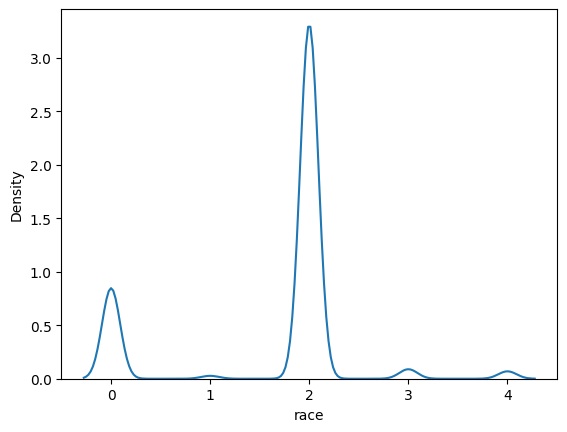

In [40]:
import seaborn as sns
sns.kdeplot(df['race'])

In [41]:
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,diagnosis
1,149190,55629189,2,Female,[10-20),NaN,1,1,7,3,...,Up,No,No,No,No,No,Ch,Yes,>30,"ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES ..."
2,64410,86047875,0,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,Yes,NO,"COMPLICATIONS OF PREGNANCY, CHILDBIRTH, AND TH..."
3,500364,82442376,2,Male,[30-40),NaN,1,1,7,2,...,Up,No,No,No,No,No,Ch,Yes,NO,INFECTIOUS AND PARASITIC DISEASES
4,16680,42519267,2,Male,[40-50),NaN,1,1,7,1,...,Steady,No,No,No,No,No,Ch,Yes,NO,NEOPLASMS
5,35754,82637451,2,Male,[50-60),NaN,2,1,2,3,...,Steady,No,No,No,No,No,No,Yes,>30,DISEASES OF THE CIRCULATORY SYSTEM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101760,443847176,50375628,0,Female,[60-70),NaN,1,1,7,6,...,Down,No,No,No,No,No,Ch,Yes,>30,DISEASES OF THE NERVOUS SYSTEM AND SENSE ORGANS
101761,443847548,100162476,0,Male,[70-80),NaN,1,3,7,3,...,Down,No,No,No,No,No,Ch,Yes,>30,"ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES ..."
101762,443847782,74694222,0,Female,[80-90),NaN,1,4,5,5,...,Steady,No,No,No,No,No,No,Yes,NO,DISEASES OF THE DIGESTIVE SYSTEM
101763,443854148,41088789,2,Male,[70-80),NaN,1,1,7,1,...,Down,No,No,No,No,No,Ch,Yes,NO,INFECTIOUS AND PARASITIC DISEASES


In [42]:
# from sklearn.impute import KNNImputer

# knn_imputer = KNNImputer(n_neighbors=5)
# knn_imputer.fit(df[['race']])  


# imputed_race = np.round(knn_imputer.transform(df[['race']])) 



In [43]:
# imputed_race

In [44]:
# k = pd.DataFrame(imputed_race)
# k[0].unique()

In [45]:
# df['race'] = k[0].to_numpy().reshape(-1,1)

In [46]:
# import seaborn as sns
# sns.kdeplot(df['race'])

## Mapping the 'age' column to its average/mean value according to the range to make it continuous

In [47]:
df['age'].unique()

array(['[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)',
       '[70-80)', '[80-90)', '[90-100)', '[0-10)'], dtype=object)

In [48]:
age_intervals = {'[0-10)': 5, '[10-20)': 15, '[20-30)': 25, '[30-40)': 35, '[40-50)': 45, '[50-60)': 55,
                 '[60-70)': 65, '[70-80)': 75, '[80-90)': 85, '[90-100)':95}  # You can extend this dictionary as needed
df['age'] = df['age'].map(age_intervals)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30768\2011632123.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['age'].map(age_intervals)


In [49]:
df['age'].unique()

array([15, 25, 35, 45, 55, 65, 75, 85, 95,  5], dtype=int64)

## Plotting 'age' column distribution before and after coverting 

C:\Users\LENOVO\.conda\envs\tf-gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOVO\.conda\envs\tf-gpu\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Density'>

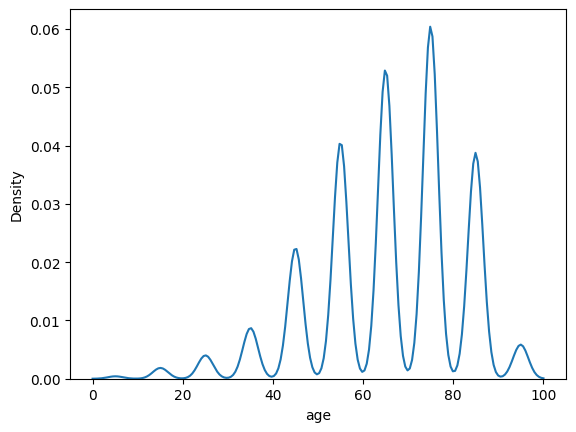

In [50]:
import seaborn as sns
sns.kdeplot(df['age'])

In [51]:
df['weight'].unique()

array([nan, '[75-100)', '[0-25)', '[50-75)', '[100-125)', '[125-150)',
       '[25-50)', '[150-175)', '>200', '[175-200)'], dtype=object)

In [52]:
w_intervals = {'[0-25)': 12.5, '[25-50)': 37.5, '[50-75)': 62.5, '[75-100)': 87.5, '[100-125)': 112.5, '[125-150)': 137.5,
                 '[150-175)': 162.5, '[175-200)': 187.5, '>200': 200}  # You can extend this dictionary as needed
df['weight'] = df['weight'].map(w_intervals)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30768\1181576369.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weight'] = df['weight'].map(w_intervals)


## Plotting distribution of 'weight' column

C:\Users\LENOVO\.conda\envs\tf-gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOVO\.conda\envs\tf-gpu\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='weight', ylabel='Density'>

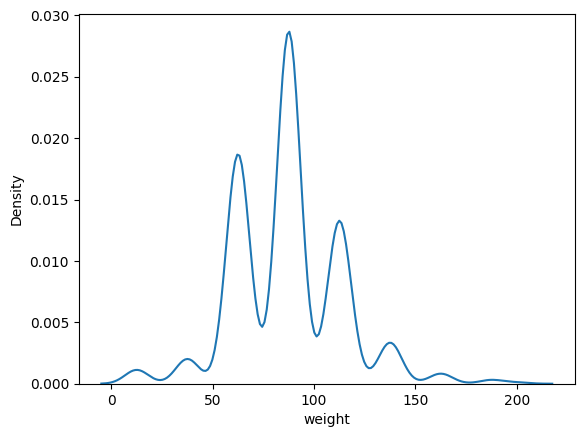

In [53]:
import seaborn as sns
sns.kdeplot(df['weight'])

In [54]:
df['weight'].value_counts()

weight
87.5     841
62.5     548
112.5    389
137.5     98
37.5      59
12.5      33
162.5     24
187.5      9
200.0      3
Name: count, dtype: int64

In [55]:
df['weight'].isnull().sum()

73249

In [56]:
df['weight'].unique()

array([  nan,  87.5,  12.5,  62.5, 112.5, 137.5,  37.5, 162.5, 200. ,
       187.5])

In [57]:
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,diagnosis
1,149190,55629189,2,Female,15,NaN,1,1,7,3,...,Up,No,No,No,No,No,Ch,Yes,>30,"ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES ..."
2,64410,86047875,0,Female,25,NaN,1,1,7,2,...,No,No,No,No,No,No,No,Yes,NO,"COMPLICATIONS OF PREGNANCY, CHILDBIRTH, AND TH..."
3,500364,82442376,2,Male,35,NaN,1,1,7,2,...,Up,No,No,No,No,No,Ch,Yes,NO,INFECTIOUS AND PARASITIC DISEASES
4,16680,42519267,2,Male,45,NaN,1,1,7,1,...,Steady,No,No,No,No,No,Ch,Yes,NO,NEOPLASMS
5,35754,82637451,2,Male,55,NaN,2,1,2,3,...,Steady,No,No,No,No,No,No,Yes,>30,DISEASES OF THE CIRCULATORY SYSTEM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101760,443847176,50375628,0,Female,65,NaN,1,1,7,6,...,Down,No,No,No,No,No,Ch,Yes,>30,DISEASES OF THE NERVOUS SYSTEM AND SENSE ORGANS
101761,443847548,100162476,0,Male,75,NaN,1,3,7,3,...,Down,No,No,No,No,No,Ch,Yes,>30,"ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES ..."
101762,443847782,74694222,0,Female,85,NaN,1,4,5,5,...,Steady,No,No,No,No,No,No,Yes,NO,DISEASES OF THE DIGESTIVE SYSTEM
101763,443854148,41088789,2,Male,75,NaN,1,1,7,1,...,Down,No,No,No,No,No,Ch,Yes,NO,INFECTIOUS AND PARASITIC DISEASES


In [58]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

## Label Encoding the 'gender' column

In [59]:
df['gender'].unique()

array(['Female', 'Male', 'Unknown/Invalid'], dtype=object)

In [60]:
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])

C:\Users\LENOVO\.conda\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\LENOVO\.conda\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30768\363142772.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'] = label_encoder.fit_transform(df['gender'])


In [61]:
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,diagnosis
1,149190,55629189,2,0,15,NaN,1,1,7,3,...,Up,No,No,No,No,No,Ch,Yes,>30,"ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES ..."
2,64410,86047875,0,0,25,NaN,1,1,7,2,...,No,No,No,No,No,No,No,Yes,NO,"COMPLICATIONS OF PREGNANCY, CHILDBIRTH, AND TH..."
3,500364,82442376,2,1,35,NaN,1,1,7,2,...,Up,No,No,No,No,No,Ch,Yes,NO,INFECTIOUS AND PARASITIC DISEASES
4,16680,42519267,2,1,45,NaN,1,1,7,1,...,Steady,No,No,No,No,No,Ch,Yes,NO,NEOPLASMS
5,35754,82637451,2,1,55,NaN,2,1,2,3,...,Steady,No,No,No,No,No,No,Yes,>30,DISEASES OF THE CIRCULATORY SYSTEM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101760,443847176,50375628,0,0,65,NaN,1,1,7,6,...,Down,No,No,No,No,No,Ch,Yes,>30,DISEASES OF THE NERVOUS SYSTEM AND SENSE ORGANS
101761,443847548,100162476,0,1,75,NaN,1,3,7,3,...,Down,No,No,No,No,No,Ch,Yes,>30,"ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES ..."
101762,443847782,74694222,0,0,85,NaN,1,4,5,5,...,Steady,No,No,No,No,No,No,Yes,NO,DISEASES OF THE DIGESTIVE SYSTEM
101763,443854148,41088789,2,1,75,NaN,1,1,7,1,...,Down,No,No,No,No,No,Ch,Yes,NO,INFECTIOUS AND PARASITIC DISEASES


## Replacing NaN values of weight column with KNN Imputing

In [62]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=10)  
knn_imputer.fit(df[['race','gender','age','weight']])  

imputed_weights = knn_imputer.transform(df[['race','gender','age','weight']]) 


C:\Users\LENOVO\.conda\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\LENOVO\.conda\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\LENOVO\.conda\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\LENOVO\.conda\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinsta

In [63]:
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,diagnosis
1,149190,55629189,2,0,15,NaN,1,1,7,3,...,Up,No,No,No,No,No,Ch,Yes,>30,"ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES ..."
2,64410,86047875,0,0,25,NaN,1,1,7,2,...,No,No,No,No,No,No,No,Yes,NO,"COMPLICATIONS OF PREGNANCY, CHILDBIRTH, AND TH..."
3,500364,82442376,2,1,35,NaN,1,1,7,2,...,Up,No,No,No,No,No,Ch,Yes,NO,INFECTIOUS AND PARASITIC DISEASES
4,16680,42519267,2,1,45,NaN,1,1,7,1,...,Steady,No,No,No,No,No,Ch,Yes,NO,NEOPLASMS
5,35754,82637451,2,1,55,NaN,2,1,2,3,...,Steady,No,No,No,No,No,No,Yes,>30,DISEASES OF THE CIRCULATORY SYSTEM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101760,443847176,50375628,0,0,65,NaN,1,1,7,6,...,Down,No,No,No,No,No,Ch,Yes,>30,DISEASES OF THE NERVOUS SYSTEM AND SENSE ORGANS
101761,443847548,100162476,0,1,75,NaN,1,3,7,3,...,Down,No,No,No,No,No,Ch,Yes,>30,"ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES ..."
101762,443847782,74694222,0,0,85,NaN,1,4,5,5,...,Steady,No,No,No,No,No,No,Yes,NO,DISEASES OF THE DIGESTIVE SYSTEM
101763,443854148,41088789,2,1,75,NaN,1,1,7,1,...,Down,No,No,No,No,No,Ch,Yes,NO,INFECTIOUS AND PARASITIC DISEASES


In [64]:
k = pd.DataFrame(imputed_weights)
k[3]

0         60.0
1         75.0
2         90.0
3        102.5
4         95.0
         ...  
75248     92.5
75249     95.0
75250     75.0
75251     92.5
75252     67.5
Name: 3, Length: 75253, dtype: float64

In [65]:
df['weight'] = k[3].to_numpy().reshape(-1,1)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30768\1058457515.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weight'] = k[3].to_numpy().reshape(-1,1)


In [66]:
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,diagnosis
1,149190,55629189,2,0,15,60.0,1,1,7,3,...,Up,No,No,No,No,No,Ch,Yes,>30,"ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES ..."
2,64410,86047875,0,0,25,75.0,1,1,7,2,...,No,No,No,No,No,No,No,Yes,NO,"COMPLICATIONS OF PREGNANCY, CHILDBIRTH, AND TH..."
3,500364,82442376,2,1,35,90.0,1,1,7,2,...,Up,No,No,No,No,No,Ch,Yes,NO,INFECTIOUS AND PARASITIC DISEASES
4,16680,42519267,2,1,45,102.5,1,1,7,1,...,Steady,No,No,No,No,No,Ch,Yes,NO,NEOPLASMS
5,35754,82637451,2,1,55,95.0,2,1,2,3,...,Steady,No,No,No,No,No,No,Yes,>30,DISEASES OF THE CIRCULATORY SYSTEM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101760,443847176,50375628,0,0,65,92.5,1,1,7,6,...,Down,No,No,No,No,No,Ch,Yes,>30,DISEASES OF THE NERVOUS SYSTEM AND SENSE ORGANS
101761,443847548,100162476,0,1,75,95.0,1,3,7,3,...,Down,No,No,No,No,No,Ch,Yes,>30,"ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES ..."
101762,443847782,74694222,0,0,85,75.0,1,4,5,5,...,Steady,No,No,No,No,No,No,Yes,NO,DISEASES OF THE DIGESTIVE SYSTEM
101763,443854148,41088789,2,1,75,92.5,1,1,7,1,...,Down,No,No,No,No,No,Ch,Yes,NO,INFECTIOUS AND PARASITIC DISEASES


## Distribution plot of 'weight' column after KNN imputing

C:\Users\LENOVO\.conda\envs\tf-gpu\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOVO\.conda\envs\tf-gpu\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='weight', ylabel='Density'>

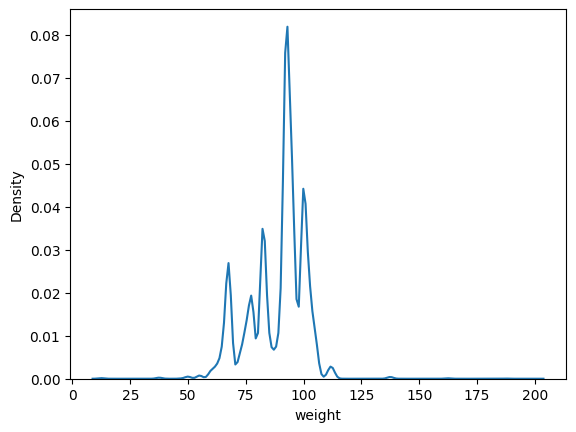

In [67]:
import seaborn as sns
sns.kdeplot(df['weight'])

In [68]:
df['age'].describe()

count    75253.000000
mean        65.682365
std         15.952734
min          5.000000
25%         55.000000
50%         65.000000
75%         75.000000
max         95.000000
Name: age, dtype: float64

In [69]:
df['weight'].describe()

count    75253.000000
mean        88.726762
std         11.997099
min         12.500000
25%         82.500000
50%         92.500000
75%         95.000000
max        200.000000
Name: weight, dtype: float64

## Boxplot of 'weight' column

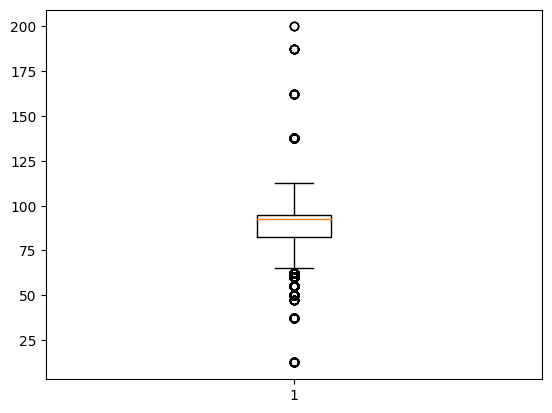

In [70]:
import matplotlib.pyplot as plt
plt.boxplot(df['weight']);

In [71]:
# 87.5     880
# 62.5     574
# 112.5    409
# 137.5    105
# 37.5      61
# 12.5      34
# 162.5     25
# 187.5     10
# 200.0      3

In [72]:
df['weight'].value_counts().sort_index()

weight
12.50        33
37.50        59
47.50        14
50.00       116
55.00       179
60.00       396
62.50       581
65.00      1256
67.50      6254
70.00        70
72.50      1130
75.00      2230
77.50      4207
80.00       391
82.50      8315
85.00      1438
87.50      1144
90.00      1970
92.50     18184
95.00      9186
96.25       582
97.50       512
100.00    10054
102.50     3938
105.00     2066
107.50       43
111.25      382
112.50      389
137.50       98
162.50       24
187.50        9
200.00        3
Name: count, dtype: int64

In [73]:
200 * 0.45


90.0

In [74]:
df[df['weight'] >66.5]

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,diagnosis
2,64410,86047875,0,0,25,75.0,1,1,7,2,...,No,No,No,No,No,No,No,Yes,NO,"COMPLICATIONS OF PREGNANCY, CHILDBIRTH, AND TH..."
3,500364,82442376,2,1,35,90.0,1,1,7,2,...,Up,No,No,No,No,No,Ch,Yes,NO,INFECTIOUS AND PARASITIC DISEASES
4,16680,42519267,2,1,45,102.5,1,1,7,1,...,Steady,No,No,No,No,No,Ch,Yes,NO,NEOPLASMS
5,35754,82637451,2,1,55,95.0,2,1,2,3,...,Steady,No,No,No,No,No,No,Yes,>30,DISEASES OF THE CIRCULATORY SYSTEM
6,55842,84259809,2,1,65,92.5,3,1,2,4,...,Steady,No,No,No,No,No,Ch,Yes,NO,DISEASES OF THE CIRCULATORY SYSTEM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101760,443847176,50375628,0,0,65,92.5,1,1,7,6,...,Down,No,No,No,No,No,Ch,Yes,>30,DISEASES OF THE NERVOUS SYSTEM AND SENSE ORGANS
101761,443847548,100162476,0,1,75,95.0,1,3,7,3,...,Down,No,No,No,No,No,Ch,Yes,>30,"ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES ..."
101762,443847782,74694222,0,0,85,75.0,1,4,5,5,...,Steady,No,No,No,No,No,No,Yes,NO,DISEASES OF THE DIGESTIVE SYSTEM
101763,443854148,41088789,2,1,75,92.5,1,1,7,1,...,Down,No,No,No,No,No,Ch,Yes,NO,INFECTIOUS AND PARASITIC DISEASES


In [75]:
df1 = df.drop(df[df['weight'] < 66.5].index) # weight is in pound

In [76]:
df1

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,diagnosis
2,64410,86047875,0,0,25,75.0,1,1,7,2,...,No,No,No,No,No,No,No,Yes,NO,"COMPLICATIONS OF PREGNANCY, CHILDBIRTH, AND TH..."
3,500364,82442376,2,1,35,90.0,1,1,7,2,...,Up,No,No,No,No,No,Ch,Yes,NO,INFECTIOUS AND PARASITIC DISEASES
4,16680,42519267,2,1,45,102.5,1,1,7,1,...,Steady,No,No,No,No,No,Ch,Yes,NO,NEOPLASMS
5,35754,82637451,2,1,55,95.0,2,1,2,3,...,Steady,No,No,No,No,No,No,Yes,>30,DISEASES OF THE CIRCULATORY SYSTEM
6,55842,84259809,2,1,65,92.5,3,1,2,4,...,Steady,No,No,No,No,No,Ch,Yes,NO,DISEASES OF THE CIRCULATORY SYSTEM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101760,443847176,50375628,0,0,65,92.5,1,1,7,6,...,Down,No,No,No,No,No,Ch,Yes,>30,DISEASES OF THE NERVOUS SYSTEM AND SENSE ORGANS
101761,443847548,100162476,0,1,75,95.0,1,3,7,3,...,Down,No,No,No,No,No,Ch,Yes,>30,"ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES ..."
101762,443847782,74694222,0,0,85,75.0,1,4,5,5,...,Steady,No,No,No,No,No,No,Yes,NO,DISEASES OF THE DIGESTIVE SYSTEM
101763,443854148,41088789,2,1,75,92.5,1,1,7,1,...,Down,No,No,No,No,No,Ch,Yes,NO,INFECTIOUS AND PARASITIC DISEASES


## Converting weight from pound to kg by mul 0.453

In [77]:
df1['weight'] = df1['weight']*0.453

## Bar plot of 'weight' column

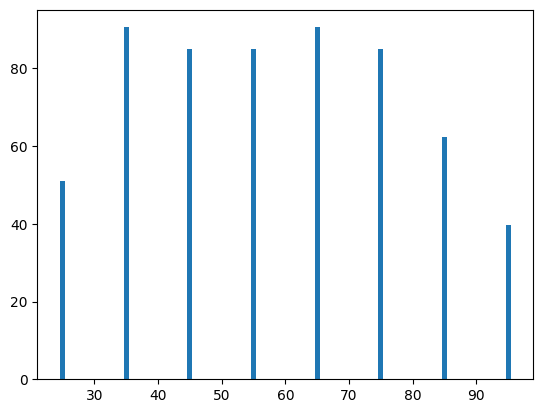

In [78]:
plt.bar(df1['age'],df1['weight']);

In [79]:
df1['age'].unique()

array([25, 35, 45, 55, 65, 75, 85, 95], dtype=int64)

In [80]:
# sample_data_after_imputing=df

# Generating new 'Symptoms' column by adding symptoms of the respective diseases by mapping it to diagnosis column

In [81]:
symptoms= {'NEOPLASMS':'Fatigue,Shortness of breath,Anemia,Diarrhea,Weight loss,Abnormal lumps or bumps',
'ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES AND IMMUNITY DISORDERS': 'Mood swings,Fatigue,Weakness,Unintended weight fluctuations,Changes in blood glucose levels or cholesterol levels',
'DISEASES OF THE BLOOD AND BLOOD-FORMING ORGANS': 'Swelling, tenderness,Heart attack,Stroke',
'MENTAL, BEHAVIORAL AND NEURODEVELOPMENTAL DISORDERS':'disorganized thoughts, delusions, and hallucination,Inattention, distractibility, impulsivity, and hyperactivity',
'DISEASES OF THE NERVOUS SYSTEM AND SENSE ORGANS': 'Persistent or sudden onset of a headache,A headache that changes or is different,Loss of feeling or tingling,Weakness or loss of muscle strength,Loss of sight or double vision,Memory loss,Impaired mental ability,Lack of coordination',
'DISEASES OF THE CIRCULATORY SYSTEM': 'Angina (chest pain with exertion),Dizziness,Dyspnea (shortness of breath),Edema (swelling, most commonly in your legs),Fainting,Fatigue,Heart palpitations (an irregular or forceful heartbeat)',
'DISEASES OF THE RESPIRATORY SYSTEM': 'Frequent coughing,A cough that produces a lot of mucus,Wheezing,Shortness of breath that gets worse with activity,A whistling or squeaking sound when you breathe,Tightness in your chest',
'DISEASES OF THE DIGESTIVE SYSTEM': 'bleeding, bloating, constipation, diarrhea, heartburn, pain, nausea and vomiting',
'DISEASES OF THE GENITOURINARY SYSTEM': 'Hematuria,Inability to urinate,Lower rib fractures,Fractures to the pelvic bone, groin or scrotum',
'COMPLICATIONS OF PREGNANCY, CHILDBIRTH, AND THE PUERPERIUM' : 'Pregnancy, Signs and symptoms associated with potentially life-threatening conditions, Headache, Hypertension, Hemorrhage, Uterine inversion, Dyspnea or chest pain,Non-life-threatening disorders and complications, Voiding difficulty and urinary retention, Symptomatic hemorrhoids, Malodorous lochia, Incontinence',
'DISEASES OF THE SKIN AND SUBCUTANEOUS TISSUE': 'Discolored skin patches (abnormal pigmentation),Dry skin,Open sores, lesions or ulcers,Peeling skin,Rashes, possibly with itchiness or pain,Red, white or pus-filled bumps,Scaly or rough skin',
'DISEASES OF THE MUSCULOSKELETAL SYSTEM AND CONNECTIVE TISSUE': 'General feeling of being unwell, This can include increased fatigue and a mild fever,Cold and numb fingers or toes,Swollen fingers or hands,Muscle and joint pain,Rash', 
'CONGENITAL ANOMALIES': 'A cleft lip and/or cleft palate,Bone growth abnormalities that cause short stature, missing limbs or scoliosis,Congenital heart conditions,Chromosome abnormalities (Down syndrome),Clubfoot,Fetal alcohol syndrome',
'CERTAIN CONDITIONS ORIGINATING IN THE PERINATAL PERIOD' :'Low birth weight,Premature birth,Seizures',
'SYMPTOMS, SIGNS, AND ILL-DEFINED CONDITIONS': 'headache, nausea, shivering, body ache, muscles fatigue',
'INJURY AND POISONING' :'Burns or redness around the mouth and lips,Breath that smells like chemicals, such as gasoline or paint thinner,Vomiting,Difficulty breathing,Drowsiness,Confusion or other altered mental status',
'SUPPLEMENTARYCLASSIFICATION OF EXTERNAL CAUSES OF INJURY AND POISONING' : 'Transport accidents,suicide attempts',
'SUPPLEMENTARY CLASSIFICATION OF FACTORS INFLUENCING HEALTH STATUS AND CONTACT WITH HEALTH SERVICES':' inadequate housing, unemployment, low income',
'INFECTIOUS AND PARASITIC DISEASES':'Fever, Muscle aches,Fatigue,Nausea,Vomiting,Diarrhea'}

In [82]:
df1['symptoms'] = df1['diagnosis'].map(symptoms)

In [83]:
df1

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,diagnosis,symptoms
2,64410,86047875,0,0,25,33.9750,1,1,7,2,...,No,No,No,No,No,No,Yes,NO,"COMPLICATIONS OF PREGNANCY, CHILDBIRTH, AND TH...","Pregnancy, Signs and symptoms associated with ..."
3,500364,82442376,2,1,35,40.7700,1,1,7,2,...,No,No,No,No,No,Ch,Yes,NO,INFECTIOUS AND PARASITIC DISEASES,NaN
4,16680,42519267,2,1,45,46.4325,1,1,7,1,...,No,No,No,No,No,Ch,Yes,NO,NEOPLASMS,"Fatigue,Shortness of breath,Anemia,Diarrhea,We..."
5,35754,82637451,2,1,55,43.0350,2,1,2,3,...,No,No,No,No,No,No,Yes,>30,DISEASES OF THE CIRCULATORY SYSTEM,"Angina (chest pain with exertion),Dizziness,Dy..."
6,55842,84259809,2,1,65,41.9025,3,1,2,4,...,No,No,No,No,No,Ch,Yes,NO,DISEASES OF THE CIRCULATORY SYSTEM,"Angina (chest pain with exertion),Dizziness,Dy..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101760,443847176,50375628,0,0,65,41.9025,1,1,7,6,...,No,No,No,No,No,Ch,Yes,>30,DISEASES OF THE NERVOUS SYSTEM AND SENSE ORGANS,"Persistent or sudden onset of a headache,A hea..."
101761,443847548,100162476,0,1,75,43.0350,1,3,7,3,...,No,No,No,No,No,Ch,Yes,>30,"ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES ...","Mood swings,Fatigue,Weakness,Unintended weight..."
101762,443847782,74694222,0,0,85,33.9750,1,4,5,5,...,No,No,No,No,No,No,Yes,NO,DISEASES OF THE DIGESTIVE SYSTEM,"bleeding, bloating, constipation, diarrhea, he..."
101763,443854148,41088789,2,1,75,41.9025,1,1,7,1,...,No,No,No,No,No,Ch,Yes,NO,INFECTIOUS AND PARASITIC DISEASES,NaN


In [84]:
symptoms['INFECTIOUS AND PARASITIC DISEASES']

'Fever, Muscle aches,Fatigue,Nausea,Vomiting,Diarrhea'

In [85]:
df1['symptoms'].fillna('Fever, Muscle aches,Fatigue,Nausea,Vomiting,Diarrhea',inplace=True)

In [86]:
df1.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'diagnosis', 'symptoms'],
      dtype='object')

In [87]:
features_drop_list=['encounter_id','patient_nbr','admission_type_id','discharge_disposition_id','admission_source_id','time_in_hospital','payer_code','medical_specialty','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','diag_1','diag_2','diag_3','number_diagnoses','metformin-rosiglitazone','metformin-pioglitazone','glimepiride-pioglitazone','glipizide-metformin','examide','tolazamide','citoglipton','tolbutamide','glyburide-metformin','acetohexamide','troglitazone','chlorpropamide','miglitol','change','readmitted']

In [88]:
df1['readmitted'].unique()

array(['NO', '>30', '<30'], dtype=object)

In [89]:
df1.drop(features_drop_list, axis=1,inplace=True)

In [90]:
df1.columns

Index(['race', 'gender', 'age', 'weight', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'glimepiride', 'glipizide',
       'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'insulin',
       'diabetesMed', 'diagnosis', 'symptoms'],
      dtype='object')

In [91]:
df1

,race,gender,age,weight,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,acarbose,insulin,diabetesMed,diagnosis,symptoms
2,0,0,25,33.9750,NaN,NaN,No,No,No,No,Steady,No,No,No,No,No,Yes,"COMPLICATIONS OF PREGNANCY, CHILDBIRTH, AND TH...","Pregnancy, Signs and symptoms associated with ..."
3,2,1,35,40.7700,NaN,NaN,No,No,No,No,No,No,No,No,No,Up,Yes,INFECTIOUS AND PARASITIC DISEASES,"Fever, Muscle aches,Fatigue,Nausea,Vomiting,Di..."
4,2,1,45,46.4325,NaN,NaN,No,No,No,No,Steady,No,No,No,No,Steady,Yes,NEOPLASMS,"Fatigue,Shortness of breath,Anemia,Diarrhea,We..."
5,2,1,55,43.0350,NaN,NaN,No,No,No,No,No,No,No,No,No,Steady,Yes,DISEASES OF THE CIRCULATORY SYSTEM,"Angina (chest pain with exertion),Dizziness,Dy..."
6,2,1,65,41.9025,NaN,NaN,Steady,No,No,Steady,No,No,No,No,No,Steady,Yes,DISEASES OF THE CIRCULATORY SYSTEM,"Angina (chest pain with exertion),Dizziness,Dy..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101760,0,0,65,41.9025,NaN,NaN,No,No,No,No,No,No,No,Steady,No,Down,Yes,DISEASES OF THE NERVOUS SYSTEM AND SENSE ORGANS,"Persistent or sudden onset of a headache,A hea..."
101761,0,1,75,43.0350,NaN,>8,Steady,No,No,No,No,No,No,No,No,Down,Yes,"ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES ...","Mood swings,Fatigue,Weakness,Unintended weight..."
101762,0,0,85,33.9750,NaN,NaN,No,No,No,No,No,No,No,No,No,Steady,Yes,DISEASES OF THE DIGESTIVE SYSTEM,"bleeding, bloating, constipation, diarrhea, he..."
101763,2,1,75,41.9025,NaN,NaN,Steady,No,No,No,No,No,No,No,No,Down,Yes,INFECTIOUS AND PARASITIC DISEASES,"Fever, Muscle aches,Fatigue,Nausea,Vomiting,Di..."


In [92]:
# before and after imputation distribution should be same little bitle skew is ok but it should be similar

In [93]:
# import random
# desired_distribution = {'up': 0.3,'down': 0.3,'steady': 0.4}
# value_counts = df['metformin'].value_counts()
# num_no_values = value_counts.get('no', 0)
# total_non_no_values = len(df) - num_no_values
# target_counts = {
#     value: int(total_non_no_values * ratio)
#     for value, ratio in desired_distribution.items()
# }
# no_indices = df[df['metformin'] == 'no'].index.tolist()
# for value, target_count in target_counts.items():
#     replace_indices = random.sample(no_indices, min(target_count, len(no_indices)))
#     df.loc[replace_indices, 'metformin'] = value
#     no_indices = list(set(no_indices) - set(replace_indices))  
# df = df.sample(frac=1).reset_index(drop=True)
# print(df)

In [94]:
df1.columns

Index(['race', 'gender', 'age', 'weight', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'glimepiride', 'glipizide',
       'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'insulin',
       'diabetesMed', 'diagnosis', 'symptoms'],
      dtype='object')

## Replacing the columns with values 'steady','up' and 'down' with 'yes' throughout the dataset

In [95]:
drug=['metformin', 'repaglinide', 'nateglinide', 'glimepiride', 'glipizide',
       'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'insulin',]
for i in drug:
    df1[i] = df1[i].str.replace('Steady', 'Yes')
    df1[i] = df1[i].str.replace('Up', 'Yes')
    df1[i] = df1[i].str.replace('Down', 'Yes')

In [96]:
df1

,race,gender,age,weight,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,acarbose,insulin,diabetesMed,diagnosis,symptoms
2,0,0,25,33.9750,NaN,NaN,No,No,No,No,Yes,No,No,No,No,No,Yes,"COMPLICATIONS OF PREGNANCY, CHILDBIRTH, AND TH...","Pregnancy, Signs and symptoms associated with ..."
3,2,1,35,40.7700,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,INFECTIOUS AND PARASITIC DISEASES,"Fever, Muscle aches,Fatigue,Nausea,Vomiting,Di..."
4,2,1,45,46.4325,NaN,NaN,No,No,No,No,Yes,No,No,No,No,Yes,Yes,NEOPLASMS,"Fatigue,Shortness of breath,Anemia,Diarrhea,We..."
5,2,1,55,43.0350,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,DISEASES OF THE CIRCULATORY SYSTEM,"Angina (chest pain with exertion),Dizziness,Dy..."
6,2,1,65,41.9025,NaN,NaN,Yes,No,No,Yes,No,No,No,No,No,Yes,Yes,DISEASES OF THE CIRCULATORY SYSTEM,"Angina (chest pain with exertion),Dizziness,Dy..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101760,0,0,65,41.9025,NaN,NaN,No,No,No,No,No,No,No,Yes,No,Yes,Yes,DISEASES OF THE NERVOUS SYSTEM AND SENSE ORGANS,"Persistent or sudden onset of a headache,A hea..."
101761,0,1,75,43.0350,NaN,>8,Yes,No,No,No,No,No,No,No,No,Yes,Yes,"ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES ...","Mood swings,Fatigue,Weakness,Unintended weight..."
101762,0,0,85,33.9750,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,DISEASES OF THE DIGESTIVE SYSTEM,"bleeding, bloating, constipation, diarrhea, he..."
101763,2,1,75,41.9025,NaN,NaN,Yes,No,No,No,No,No,No,No,No,Yes,Yes,INFECTIOUS AND PARASITIC DISEASES,"Fever, Muscle aches,Fatigue,Nausea,Vomiting,Di..."


In [97]:
sample2_after_imputing=df1

In [98]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
from sklearn.datasets import make_classification

# Example: Create an imbalanced dataset
data, target = make_classification(n_classes=2, class_sep=2,
                                   weights=[0.1, 0.9], n_informative=3,
                                   n_redundant=1, flip_y=0, n_features=20,
                                   n_clusters_per_class=1, n_samples=1000,
                                   random_state=42)

df2= pd.DataFrame(data)
df2['target'] = target

In [99]:
df2

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,target
0,-0.259817,-0.312491,-1.313846,0.013979,2.313887,0.797484,-0.805132,0.004881,0.521465,-0.419210,...,-0.944588,-1.078652,2.552324,0.894595,-0.264312,0.833256,2.038000,1.249897,0.525720,1
1,0.992252,0.000562,-0.129784,0.664117,0.490197,-0.096228,0.386317,0.866320,-1.091749,-0.845249,...,1.640752,-0.156496,3.215145,-0.186648,-0.424772,0.889042,1.768956,0.610236,1.200708,1
2,-0.261300,0.415475,-1.518536,-0.351272,-1.868803,-1.619942,-0.788849,0.627611,-0.890377,1.865845,...,1.309137,-0.906808,2.501372,-1.456588,-0.900970,1.572306,2.255426,-0.059367,-2.461980,1
3,1.508247,0.112321,-1.921020,0.318797,-1.861950,-0.249810,-0.152811,-0.097986,1.146178,1.319636,...,1.262490,-0.951269,-1.893316,-2.198693,-0.392942,-0.603890,1.778547,0.223091,-0.721050,0
4,-0.602258,0.990800,0.034861,-0.992561,-0.120289,0.928163,0.755103,0.453428,0.572615,-0.722801,...,0.177486,0.068463,2.454500,-0.039650,1.464667,1.856328,1.282718,0.074152,0.919429,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.764105,-0.821470,-1.868551,1.054412,0.381966,0.760118,1.290261,1.622498,0.531097,-0.700537,...,0.416930,0.022204,-2.919904,1.004377,-0.687227,-1.460925,2.177177,-0.095310,-1.779429,0
996,0.521503,-0.224623,-0.125880,-0.335207,-0.668752,0.084106,-0.706905,-2.404550,-0.877455,0.970805,...,0.626595,0.312651,1.575279,1.857929,-1.630557,1.782454,0.467157,3.014712,0.055263,1
997,-0.974791,-1.355649,-2.251507,-0.345543,0.706770,0.201055,-0.272094,0.335260,0.481443,-0.963591,...,0.832270,0.837457,2.245075,0.726240,1.426836,0.166782,2.210285,-1.072236,-0.126661,1
998,0.174488,-0.729036,-0.948593,-0.743272,0.119191,0.433455,2.577054,0.290621,-0.441263,1.455243,...,0.835260,0.198888,1.704672,-1.417077,-0.275910,1.212260,1.467235,0.437823,-0.963761,1


In [100]:
sample2_after_imputing

,race,gender,age,weight,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,acarbose,insulin,diabetesMed,diagnosis,symptoms
2,0,0,25,33.9750,NaN,NaN,No,No,No,No,Yes,No,No,No,No,No,Yes,"COMPLICATIONS OF PREGNANCY, CHILDBIRTH, AND TH...","Pregnancy, Signs and symptoms associated with ..."
3,2,1,35,40.7700,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,INFECTIOUS AND PARASITIC DISEASES,"Fever, Muscle aches,Fatigue,Nausea,Vomiting,Di..."
4,2,1,45,46.4325,NaN,NaN,No,No,No,No,Yes,No,No,No,No,Yes,Yes,NEOPLASMS,"Fatigue,Shortness of breath,Anemia,Diarrhea,We..."
5,2,1,55,43.0350,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,DISEASES OF THE CIRCULATORY SYSTEM,"Angina (chest pain with exertion),Dizziness,Dy..."
6,2,1,65,41.9025,NaN,NaN,Yes,No,No,Yes,No,No,No,No,No,Yes,Yes,DISEASES OF THE CIRCULATORY SYSTEM,"Angina (chest pain with exertion),Dizziness,Dy..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101760,0,0,65,41.9025,NaN,NaN,No,No,No,No,No,No,No,Yes,No,Yes,Yes,DISEASES OF THE NERVOUS SYSTEM AND SENSE ORGANS,"Persistent or sudden onset of a headache,A hea..."
101761,0,1,75,43.0350,NaN,>8,Yes,No,No,No,No,No,No,No,No,Yes,Yes,"ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES ...","Mood swings,Fatigue,Weakness,Unintended weight..."
101762,0,0,85,33.9750,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,DISEASES OF THE DIGESTIVE SYSTEM,"bleeding, bloating, constipation, diarrhea, he..."
101763,2,1,75,41.9025,NaN,NaN,Yes,No,No,No,No,No,No,No,No,Yes,Yes,INFECTIOUS AND PARASITIC DISEASES,"Fever, Muscle aches,Fatigue,Nausea,Vomiting,Di..."


In [101]:
drug

['metformin',
 'repaglinide',
 'nateglinide',
 'glimepiride',
 'glipizide',
 'glyburide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'insulin']

## Label Encoding the respective drug columns

In [102]:
for i in drug:
    label_encoder = LabelEncoder()
    df1[i] = label_encoder.fit_transform(df1[i])

C:\Users\LENOVO\.conda\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\LENOVO\.conda\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\LENOVO\.conda\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\LENOVO\.conda\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_spar

In [103]:
df1

,race,gender,age,weight,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,acarbose,insulin,diabetesMed,diagnosis,symptoms
2,0,0,25,33.9750,NaN,NaN,0,0,0,0,1,0,0,0,0,0,Yes,"COMPLICATIONS OF PREGNANCY, CHILDBIRTH, AND TH...","Pregnancy, Signs and symptoms associated with ..."
3,2,1,35,40.7700,NaN,NaN,0,0,0,0,0,0,0,0,0,1,Yes,INFECTIOUS AND PARASITIC DISEASES,"Fever, Muscle aches,Fatigue,Nausea,Vomiting,Di..."
4,2,1,45,46.4325,NaN,NaN,0,0,0,0,1,0,0,0,0,1,Yes,NEOPLASMS,"Fatigue,Shortness of breath,Anemia,Diarrhea,We..."
5,2,1,55,43.0350,NaN,NaN,0,0,0,0,0,0,0,0,0,1,Yes,DISEASES OF THE CIRCULATORY SYSTEM,"Angina (chest pain with exertion),Dizziness,Dy..."
6,2,1,65,41.9025,NaN,NaN,1,0,0,1,0,0,0,0,0,1,Yes,DISEASES OF THE CIRCULATORY SYSTEM,"Angina (chest pain with exertion),Dizziness,Dy..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101760,0,0,65,41.9025,NaN,NaN,0,0,0,0,0,0,0,1,0,1,Yes,DISEASES OF THE NERVOUS SYSTEM AND SENSE ORGANS,"Persistent or sudden onset of a headache,A hea..."
101761,0,1,75,43.0350,NaN,>8,1,0,0,0,0,0,0,0,0,1,Yes,"ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES ...","Mood swings,Fatigue,Weakness,Unintended weight..."
101762,0,0,85,33.9750,NaN,NaN,0,0,0,0,0,0,0,0,0,1,Yes,DISEASES OF THE DIGESTIVE SYSTEM,"bleeding, bloating, constipation, diarrhea, he..."
101763,2,1,75,41.9025,NaN,NaN,1,0,0,0,0,0,0,0,0,1,Yes,INFECTIOUS AND PARASITIC DISEASES,"Fever, Muscle aches,Fatigue,Nausea,Vomiting,Di..."


In [104]:
df1.columns

Index(['race', 'gender', 'age', 'weight', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'glimepiride', 'glipizide',
       'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'insulin',
       'diabetesMed', 'diagnosis', 'symptoms'],
      dtype='object')

In [105]:
sample2_after_imputing

,race,gender,age,weight,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,acarbose,insulin,diabetesMed,diagnosis,symptoms
2,0,0,25,33.9750,NaN,NaN,0,0,0,0,1,0,0,0,0,0,Yes,"COMPLICATIONS OF PREGNANCY, CHILDBIRTH, AND TH...","Pregnancy, Signs and symptoms associated with ..."
3,2,1,35,40.7700,NaN,NaN,0,0,0,0,0,0,0,0,0,1,Yes,INFECTIOUS AND PARASITIC DISEASES,"Fever, Muscle aches,Fatigue,Nausea,Vomiting,Di..."
4,2,1,45,46.4325,NaN,NaN,0,0,0,0,1,0,0,0,0,1,Yes,NEOPLASMS,"Fatigue,Shortness of breath,Anemia,Diarrhea,We..."
5,2,1,55,43.0350,NaN,NaN,0,0,0,0,0,0,0,0,0,1,Yes,DISEASES OF THE CIRCULATORY SYSTEM,"Angina (chest pain with exertion),Dizziness,Dy..."
6,2,1,65,41.9025,NaN,NaN,1,0,0,1,0,0,0,0,0,1,Yes,DISEASES OF THE CIRCULATORY SYSTEM,"Angina (chest pain with exertion),Dizziness,Dy..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101760,0,0,65,41.9025,NaN,NaN,0,0,0,0,0,0,0,1,0,1,Yes,DISEASES OF THE NERVOUS SYSTEM AND SENSE ORGANS,"Persistent or sudden onset of a headache,A hea..."
101761,0,1,75,43.0350,NaN,>8,1,0,0,0,0,0,0,0,0,1,Yes,"ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES ...","Mood swings,Fatigue,Weakness,Unintended weight..."
101762,0,0,85,33.9750,NaN,NaN,0,0,0,0,0,0,0,0,0,1,Yes,DISEASES OF THE DIGESTIVE SYSTEM,"bleeding, bloating, constipation, diarrhea, he..."
101763,2,1,75,41.9025,NaN,NaN,1,0,0,0,0,0,0,0,0,1,Yes,INFECTIOUS AND PARASITIC DISEASES,"Fever, Muscle aches,Fatigue,Nausea,Vomiting,Di..."


In [106]:
abc=sample2_after_imputing

In [107]:
abc.columns

Index(['race', 'gender', 'age', 'weight', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'glimepiride', 'glipizide',
       'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'insulin',
       'diabetesMed', 'diagnosis', 'symptoms'],
      dtype='object')

In [108]:
b=abc[['metformin',
       'repaglinide', 'nateglinide', 'glimepiride', 'glipizide', 'glyburide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'insulin']]

## Creating a new column named 'drugname' and appending all the drugs into a single column

In [109]:
b['drugname'] = b.apply(lambda row: [col for col in b.columns[row == 1]], axis=1)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30768\1341096362.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['drugname'] = b.apply(lambda row: [col for col in b.columns[row == 1]], axis=1)


In [110]:
b

,metformin,repaglinide,nateglinide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,acarbose,insulin,drugname
2,0,0,0,0,1,0,0,0,0,0,[glipizide]
3,0,0,0,0,0,0,0,0,0,1,[insulin]
4,0,0,0,0,1,0,0,0,0,1,"[glipizide, insulin]"
5,0,0,0,0,0,0,0,0,0,1,[insulin]
6,1,0,0,1,0,0,0,0,0,1,"[metformin, glimepiride, insulin]"
...,...,...,...,...,...,...,...,...,...,...,...
101760,0,0,0,0,0,0,0,1,0,1,"[rosiglitazone, insulin]"
101761,1,0,0,0,0,0,0,0,0,1,"[metformin, insulin]"
101762,0,0,0,0,0,0,0,0,0,1,[insulin]
101763,1,0,0,0,0,0,0,0,0,1,"[metformin, insulin]"


In [111]:
b.columns

Index(['metformin', 'repaglinide', 'nateglinide', 'glimepiride', 'glipizide',
       'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'insulin',
       'drugname'],
      dtype='object')

In [112]:
drug=['metformin', 'repaglinide', 'nateglinide', 'glimepiride', 'glipizide',
       'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'insulin']

In [113]:
for i in drug:
    print(b[i].value_counts())
    print('##########')

metformin
0    53872
1    18747
Name: count, dtype: int64
##########
repaglinide
0    71192
1     1427
Name: count, dtype: int64
##########
nateglinide
0    71971
1      648
Name: count, dtype: int64
##########
glimepiride
0    67811
1     4808
Name: count, dtype: int64
##########
glipizide
0    60828
1    11791
Name: count, dtype: int64
##########
glyburide
0    62747
1     9872
Name: count, dtype: int64
##########
pioglitazone
0    65741
1     6878
Name: count, dtype: int64
##########
rosiglitazone
0    66624
1     5995
Name: count, dtype: int64
##########
acarbose
0    72328
1      291
Name: count, dtype: int64
##########
insulin
1    50403
0    22216
Name: count, dtype: int64
##########


In [114]:
df1['drugname']=b['drugname']

In [115]:
df1

,race,gender,age,weight,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,acarbose,insulin,diabetesMed,diagnosis,symptoms,drugname
2,0,0,25,33.9750,NaN,NaN,0,0,0,0,1,0,0,0,0,0,Yes,"COMPLICATIONS OF PREGNANCY, CHILDBIRTH, AND TH...","Pregnancy, Signs and symptoms associated with ...",[glipizide]
3,2,1,35,40.7700,NaN,NaN,0,0,0,0,0,0,0,0,0,1,Yes,INFECTIOUS AND PARASITIC DISEASES,"Fever, Muscle aches,Fatigue,Nausea,Vomiting,Di...",[insulin]
4,2,1,45,46.4325,NaN,NaN,0,0,0,0,1,0,0,0,0,1,Yes,NEOPLASMS,"Fatigue,Shortness of breath,Anemia,Diarrhea,We...","[glipizide, insulin]"
5,2,1,55,43.0350,NaN,NaN,0,0,0,0,0,0,0,0,0,1,Yes,DISEASES OF THE CIRCULATORY SYSTEM,"Angina (chest pain with exertion),Dizziness,Dy...",[insulin]
6,2,1,65,41.9025,NaN,NaN,1,0,0,1,0,0,0,0,0,1,Yes,DISEASES OF THE CIRCULATORY SYSTEM,"Angina (chest pain with exertion),Dizziness,Dy...","[metformin, glimepiride, insulin]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101760,0,0,65,41.9025,NaN,NaN,0,0,0,0,0,0,0,1,0,1,Yes,DISEASES OF THE NERVOUS SYSTEM AND SENSE ORGANS,"Persistent or sudden onset of a headache,A hea...","[rosiglitazone, insulin]"
101761,0,1,75,43.0350,NaN,>8,1,0,0,0,0,0,0,0,0,1,Yes,"ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES ...","Mood swings,Fatigue,Weakness,Unintended weight...","[metformin, insulin]"
101762,0,0,85,33.9750,NaN,NaN,0,0,0,0,0,0,0,0,0,1,Yes,DISEASES OF THE DIGESTIVE SYSTEM,"bleeding, bloating, constipation, diarrhea, he...",[insulin]
101763,2,1,75,41.9025,NaN,NaN,1,0,0,0,0,0,0,0,0,1,Yes,INFECTIOUS AND PARASITIC DISEASES,"Fever, Muscle aches,Fatigue,Nausea,Vomiting,Di...","[metformin, insulin]"


In [116]:
b = df1.to_csv('explode.csv')

In [117]:
df1 = pd.read_csv('explode.csv')

In [118]:
df1.drop('Unnamed: 0',axis =1,inplace=True)

In [119]:
df1.columns

Index(['race', 'gender', 'age', 'weight', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'glimepiride', 'glipizide',
       'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'insulin',
       'diabetesMed', 'diagnosis', 'symptoms', 'drugname'],
      dtype='object')

In [120]:
c_d = ['metformin', 'repaglinide', 'nateglinide', 'glimepiride', 'glipizide',
       'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'insulin']

In [121]:
df1.drop('diabetesMed', axis=1,inplace=True)

In [122]:
df1

,race,gender,age,weight,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,acarbose,insulin,diagnosis,symptoms,drugname
0,0,0,25,33.9750,NaN,NaN,0,0,0,0,1,0,0,0,0,0,"COMPLICATIONS OF PREGNANCY, CHILDBIRTH, AND TH...","Pregnancy, Signs and symptoms associated with ...",['glipizide']
1,2,1,35,40.7700,NaN,NaN,0,0,0,0,0,0,0,0,0,1,INFECTIOUS AND PARASITIC DISEASES,"Fever, Muscle aches,Fatigue,Nausea,Vomiting,Di...",['insulin']
2,2,1,45,46.4325,NaN,NaN,0,0,0,0,1,0,0,0,0,1,NEOPLASMS,"Fatigue,Shortness of breath,Anemia,Diarrhea,We...","['glipizide', 'insulin']"
3,2,1,55,43.0350,NaN,NaN,0,0,0,0,0,0,0,0,0,1,DISEASES OF THE CIRCULATORY SYSTEM,"Angina (chest pain with exertion),Dizziness,Dy...",['insulin']
4,2,1,65,41.9025,NaN,NaN,1,0,0,1,0,0,0,0,0,1,DISEASES OF THE CIRCULATORY SYSTEM,"Angina (chest pain with exertion),Dizziness,Dy...","['metformin', 'glimepiride', 'insulin']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72614,0,0,65,41.9025,NaN,NaN,0,0,0,0,0,0,0,1,0,1,DISEASES OF THE NERVOUS SYSTEM AND SENSE ORGANS,"Persistent or sudden onset of a headache,A hea...","['rosiglitazone', 'insulin']"
72615,0,1,75,43.0350,NaN,>8,1,0,0,0,0,0,0,0,0,1,"ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES ...","Mood swings,Fatigue,Weakness,Unintended weight...","['metformin', 'insulin']"
72616,0,0,85,33.9750,NaN,NaN,0,0,0,0,0,0,0,0,0,1,DISEASES OF THE DIGESTIVE SYSTEM,"bleeding, bloating, constipation, diarrhea, he...",['insulin']
72617,2,1,75,41.9025,NaN,NaN,1,0,0,0,0,0,0,0,0,1,INFECTIOUS AND PARASITIC DISEASES,"Fever, Muscle aches,Fatigue,Nausea,Vomiting,Di...","['metformin', 'insulin']"


In [123]:
df1['symptoms'] = df1['symptoms'].str.lower()

In [124]:
df1

,race,gender,age,weight,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,acarbose,insulin,diagnosis,symptoms,drugname
0,0,0,25,33.9750,NaN,NaN,0,0,0,0,1,0,0,0,0,0,"COMPLICATIONS OF PREGNANCY, CHILDBIRTH, AND TH...","pregnancy, signs and symptoms associated with ...",['glipizide']
1,2,1,35,40.7700,NaN,NaN,0,0,0,0,0,0,0,0,0,1,INFECTIOUS AND PARASITIC DISEASES,"fever, muscle aches,fatigue,nausea,vomiting,di...",['insulin']
2,2,1,45,46.4325,NaN,NaN,0,0,0,0,1,0,0,0,0,1,NEOPLASMS,"fatigue,shortness of breath,anemia,diarrhea,we...","['glipizide', 'insulin']"
3,2,1,55,43.0350,NaN,NaN,0,0,0,0,0,0,0,0,0,1,DISEASES OF THE CIRCULATORY SYSTEM,"angina (chest pain with exertion),dizziness,dy...",['insulin']
4,2,1,65,41.9025,NaN,NaN,1,0,0,1,0,0,0,0,0,1,DISEASES OF THE CIRCULATORY SYSTEM,"angina (chest pain with exertion),dizziness,dy...","['metformin', 'glimepiride', 'insulin']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72614,0,0,65,41.9025,NaN,NaN,0,0,0,0,0,0,0,1,0,1,DISEASES OF THE NERVOUS SYSTEM AND SENSE ORGANS,"persistent or sudden onset of a headache,a hea...","['rosiglitazone', 'insulin']"
72615,0,1,75,43.0350,NaN,>8,1,0,0,0,0,0,0,0,0,1,"ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES ...","mood swings,fatigue,weakness,unintended weight...","['metformin', 'insulin']"
72616,0,0,85,33.9750,NaN,NaN,0,0,0,0,0,0,0,0,0,1,DISEASES OF THE DIGESTIVE SYSTEM,"bleeding, bloating, constipation, diarrhea, he...",['insulin']
72617,2,1,75,41.9025,NaN,NaN,1,0,0,0,0,0,0,0,0,1,INFECTIOUS AND PARASITIC DISEASES,"fever, muscle aches,fatigue,nausea,vomiting,di...","['metformin', 'insulin']"


In [125]:
symptoms= {'NEOPLASMS':'Fatigue,Shortness of breath,Anemia,Diarrhea,Weight loss,Abnormal lumps or bumps',
'ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES AND IMMUNITY DISORDERS': 'Mood swings,Fatigue,Weakness,Unintended weight fluctuations,Changes in blood glucose levels or cholesterol levels',
'DISEASES OF THE BLOOD AND BLOOD-FORMING ORGANS': 'Swelling, tenderness,Heart attack,Stroke',
'MENTAL, BEHAVIORAL AND NEURODEVELOPMENTAL DISORDERS':'disorganized thoughts, delusions, and hallucination,Inattention, distractibility, impulsivity, and hyperactivity',
'DISEASES OF THE NERVOUS SYSTEM AND SENSE ORGANS': 'Persistent or sudden onset of a headache,A headache that changes or is different,Loss of feeling or tingling,Weakness or loss of muscle strength,Loss of sight or double vision,Memory loss,Impaired mental ability,Lack of coordination',
'DISEASES OF THE CIRCULATORY SYSTEM': 'Angina (chest pain with exertion),Dizziness,Dyspnea (shortness of breath),Edema (swelling, most commonly in your legs),Fainting,Fatigue,Heart palpitations (an irregular or forceful heartbeat)',
'DISEASES OF THE RESPIRATORY SYSTEM': 'Frequent coughing,A cough that produces a lot of mucus,Wheezing,Shortness of breath that gets worse with activity,A whistling or squeaking sound when you breathe,Tightness in your chest',
'DISEASES OF THE DIGESTIVE SYSTEM': 'bleeding, bloating, constipation, diarrhea, heartburn, pain, nausea and vomiting',
'DISEASES OF THE GENITOURINARY SYSTEM': 'Hematuria,Inability to urinate,Lower rib fractures,Fractures to the pelvic bone, groin or scrotum',
'COMPLICATIONS OF PREGNANCY, CHILDBIRTH, AND THE PUERPERIUM' : 'Pregnancy, Signs and symptoms associated with potentially life-threatening conditions, Headache, Hypertension, Hemorrhage, Uterine inversion, Dyspnea or chest pain,Non-life-threatening disorders and complications, Voiding difficulty and urinary retention, Symptomatic hemorrhoids, Malodorous lochia, Incontinence',
'DISEASES OF THE SKIN AND SUBCUTANEOUS TISSUE': 'Discolored skin patches (abnormal pigmentation),Dry skin,Open sores, lesions or ulcers,Peeling skin,Rashes, possibly with itchiness or pain,Red, white or pus-filled bumps,Scaly or rough skin',
'DISEASES OF THE MUSCULOSKELETAL SYSTEM AND CONNECTIVE TISSUE': 'General feeling of being unwell, This can include increased fatigue and a mild fever,Cold and numb fingers or toes,Swollen fingers or hands,Muscle and joint pain,Rash', 
'CONGENITAL ANOMALIES': 'A cleft lip and/or cleft palate,Bone growth abnormalities that cause short stature, missing limbs or scoliosis,Congenital heart conditions,Chromosome abnormalities (Down syndrome),Clubfoot,Fetal alcohol syndrome',
'CERTAIN CONDITIONS ORIGINATING IN THE PERINATAL PERIOD' :'Low birth weight,Premature birth,Seizures',
'SYMPTOMS, SIGNS, AND ILL-DEFINED CONDITIONS': 'headache, nausea, shivering, body ache, muscles fatigue',
'INJURY AND POISONING' :'Burns or redness around the mouth and lips,Breath that smells like chemicals, such as gasoline or paint thinner,Vomiting,Difficulty breathing,Drowsiness,Confusion or other altered mental status',
'SUPPLEMENTARYCLASSIFICATION OF EXTERNAL CAUSES OF INJURY AND POISONING' : 'Transport accidents,suicide attempts',
'SUPPLEMENTARY CLASSIFICATION OF FACTORS INFLUENCING HEALTH STATUS AND CONTACT WITH HEALTH SERVICES':' inadequate housing, unemployment, low income',
'INFECTIOUS AND PARASITIC DISEASES':'Fever, Muscle aches,Fatigue,Nausea,Vomiting,Diarrhea'}

In [126]:
diabetes_type = {'Type_1':'fatigue, nausea, vomiting, weakness, excessive thirst, excessive hunger, frequent urination, weight loss, stomach pain, fruity-smelling breath, labored breathing',
'Type_2': 'blurred vision, hard to heal skin, gum, bladder infections, tingling , numbness, dark skin',
'Type_3': 'pregnancy'}

## Creating a new diabetic type column with respect to symptoms column and mapping it to the respective symptoms

In [127]:
symptoms_df = pd.DataFrame.from_dict(symptoms, orient='index', columns=['Symptoms'])

asa = {
    'Type_1': ['fatigue', 'nausea', 'vomiting', 'weakness', 'excessive thirst', 'excessive hunger', 'frequent urination', 'weight loss', 'stomach pain', 'fruity-smelling breath', 'labored breathing'],
    'Type_2': ['skin','blurred vision', 'hard to heal skin', 'gum', 'bladder infections', 'tingling', 'numbness', 'dark skin'],
    'Type_3': ['pregnancy']
}

def map_diabetes_type(symptom_list):
    matched_keywords = []
    for diabetes_type, type_keywords in asa.items():
        matching_keywords = [keyword for keyword in type_keywords if any(keyword in symptom for symptom in symptom_list)]
        if matching_keywords:
            matched_keywords.extend(matching_keywords)
            return diabetes_type, matched_keywords
    return None, []

symptoms_df['Symptom Keywords'] = symptoms_df['Symptoms'].str.lower().str.replace('[,.]', '').str.split()
symptoms_df[['Diabetes Type', 'Matched Keywords']] = symptoms_df['Symptom Keywords'].apply(map_diabetes_type).apply(pd.Series)

symptoms_df


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30768\3318785340.py:19: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  symptoms_df[['Diabetes Type', 'Matched Keywords']] = symptoms_df['Symptom Keywords'].apply(map_diabetes_type).apply(pd.Series)


,Symptoms,Symptom Keywords,Diabetes Type,Matched Keywords
NEOPLASMS,"Fatigue,Shortness of breath,Anemia,Diarrhea,We...","[fatigue,shortness, of, breath,anemia,diarrhea...",Type_1,[fatigue]
"ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES AND IMMUNITY DISORDERS","Mood swings,Fatigue,Weakness,Unintended weight...","[mood, swings,fatigue,weakness,unintended, wei...",Type_1,"[fatigue, weakness]"
DISEASES OF THE BLOOD AND BLOOD-FORMING ORGANS,"Swelling, tenderness,Heart attack,Stroke","[swelling,, tenderness,heart, attack,stroke]",None,[]
"MENTAL, BEHAVIORAL AND NEURODEVELOPMENTAL DISORDERS","disorganized thoughts, delusions, and hallucin...","[disorganized, thoughts,, delusions,, and, hal...",None,[]
DISEASES OF THE NERVOUS SYSTEM AND SENSE ORGANS,"Persistent or sudden onset of a headache,A hea...","[persistent, or, sudden, onset, of, a, headach...",Type_1,[weakness]
DISEASES OF THE CIRCULATORY SYSTEM,"Angina (chest pain with exertion),Dizziness,Dy...","[angina, (chest, pain, with, exertion),dizzine...",Type_1,[fatigue]
DISEASES OF THE RESPIRATORY SYSTEM,"Frequent coughing,A cough that produces a lot ...","[frequent, coughing,a, cough, that, produces, ...",None,[]
DISEASES OF THE DIGESTIVE SYSTEM,"bleeding, bloating, constipation, diarrhea, he...","[bleeding,, bloating,, constipation,, diarrhea...",Type_1,"[nausea, vomiting]"
DISEASES OF THE GENITOURINARY SYSTEM,"Hematuria,Inability to urinate,Lower rib fract...","[hematuria,inability, to, urinate,lower, rib, ...",None,[]
"COMPLICATIONS OF PREGNANCY, CHILDBIRTH, AND THE PUERPERIUM","Pregnancy, Signs and symptoms associated with ...","[pregnancy,, signs, and, symptoms, associated,...",Type_3,[pregnancy]


In [128]:
import pandas as pd

asa = {
    'Type_1': ['fatigue', 'nausea', 'vomiting', 'weakness', 'excessive thirst', 'excessive hunger', 'frequent urination', 'weight loss', 'stomach pain', 'fruity-smelling breath', 'labored breathing'],
    'Type_2': ['skin', 'blurred vision', 'hard to heal skin', 'gum', 'bladder infections', 'tingling', 'numbness', 'dark skin'],
    'Type_3': ['pregnancy']
}

def map_diabetes_type(symptom_list):
    matched_keywords = []
    for diabetes_type, type_keywords in asa.items():
        matching_keywords = [keyword for keyword in type_keywords if any(keyword in symptom for symptom in symptom_list)]
        if matching_keywords:
            matched_keywords.extend(matching_keywords)
            return diabetes_type, matched_keywords
    return None, []

df1['Symptom Keywords'] = df1['symptoms'].astype(str).str.lower().str.split()
df1[['Diabetes Type', 'Matched Keywords']] = df1['Symptom Keywords'].apply(map_diabetes_type).apply(pd.Series)

df1


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30768\2716177162.py:19: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  df1[['Diabetes Type', 'Matched Keywords']] = df1['Symptom Keywords'].apply(map_diabetes_type).apply(pd.Series)


,race,gender,age,weight,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,glimepiride,...,pioglitazone,rosiglitazone,acarbose,insulin,diagnosis,symptoms,drugname,Symptom Keywords,Diabetes Type,Matched Keywords
0,0,0,25,33.9750,NaN,NaN,0,0,0,0,...,0,0,0,0,"COMPLICATIONS OF PREGNANCY, CHILDBIRTH, AND TH...","pregnancy, signs and symptoms associated with ...",['glipizide'],"[pregnancy,, signs, and, symptoms, associated,...",Type_3,[pregnancy]
1,2,1,35,40.7700,NaN,NaN,0,0,0,0,...,0,0,0,1,INFECTIOUS AND PARASITIC DISEASES,"fever, muscle aches,fatigue,nausea,vomiting,di...",['insulin'],"[fever,, muscle, aches,fatigue,nausea,vomiting...",Type_1,"[fatigue, nausea, vomiting]"
2,2,1,45,46.4325,NaN,NaN,0,0,0,0,...,0,0,0,1,NEOPLASMS,"fatigue,shortness of breath,anemia,diarrhea,we...","['glipizide', 'insulin']","[fatigue,shortness, of, breath,anemia,diarrhea...",Type_1,[fatigue]
3,2,1,55,43.0350,NaN,NaN,0,0,0,0,...,0,0,0,1,DISEASES OF THE CIRCULATORY SYSTEM,"angina (chest pain with exertion),dizziness,dy...",['insulin'],"[angina, (chest, pain, with, exertion),dizzine...",Type_1,[fatigue]
4,2,1,65,41.9025,NaN,NaN,1,0,0,1,...,0,0,0,1,DISEASES OF THE CIRCULATORY SYSTEM,"angina (chest pain with exertion),dizziness,dy...","['metformin', 'glimepiride', 'insulin']","[angina, (chest, pain, with, exertion),dizzine...",Type_1,[fatigue]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72614,0,0,65,41.9025,NaN,NaN,0,0,0,0,...,0,1,0,1,DISEASES OF THE NERVOUS SYSTEM AND SENSE ORGANS,"persistent or sudden onset of a headache,a hea...","['rosiglitazone', 'insulin']","[persistent, or, sudden, onset, of, a, headach...",Type_1,[weakness]
72615,0,1,75,43.0350,NaN,>8,1,0,0,0,...,0,0,0,1,"ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES ...","mood swings,fatigue,weakness,unintended weight...","['metformin', 'insulin']","[mood, swings,fatigue,weakness,unintended, wei...",Type_1,"[fatigue, weakness]"
72616,0,0,85,33.9750,NaN,NaN,0,0,0,0,...,0,0,0,1,DISEASES OF THE DIGESTIVE SYSTEM,"bleeding, bloating, constipation, diarrhea, he...",['insulin'],"[bleeding,, bloating,, constipation,, diarrhea...",Type_1,"[nausea, vomiting]"
72617,2,1,75,41.9025,NaN,NaN,1,0,0,0,...,0,0,0,1,INFECTIOUS AND PARASITIC DISEASES,"fever, muscle aches,fatigue,nausea,vomiting,di...","['metformin', 'insulin']","[fever,, muscle, aches,fatigue,nausea,vomiting...",Type_1,"[fatigue, nausea, vomiting]"


In [129]:
df1['Diabetes Type'].value_counts()

Diabetes Type
Type_1    56048
Type_2     1988
Type_3      417
Name: count, dtype: int64

In [130]:
df1.isnull().sum()

race                    0
gender                  0
age                     0
weight                  0
max_glu_serum       68905
A1Cresult           59481
metformin               0
repaglinide             0
nateglinide             0
glimepiride             0
glipizide               0
glyburide               0
pioglitazone            0
rosiglitazone           0
acarbose                0
insulin                 0
diagnosis               0
symptoms                0
drugname                0
Symptom Keywords        0
Diabetes Type       14166
Matched Keywords        0
dtype: int64

In [131]:
df1.drop(['Symptom Keywords','Matched Keywords'],axis=1,inplace=True)

In [132]:
df1

,race,gender,age,weight,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,acarbose,insulin,diagnosis,symptoms,drugname,Diabetes Type
0,0,0,25,33.9750,NaN,NaN,0,0,0,0,1,0,0,0,0,0,"COMPLICATIONS OF PREGNANCY, CHILDBIRTH, AND TH...","pregnancy, signs and symptoms associated with ...",['glipizide'],Type_3
1,2,1,35,40.7700,NaN,NaN,0,0,0,0,0,0,0,0,0,1,INFECTIOUS AND PARASITIC DISEASES,"fever, muscle aches,fatigue,nausea,vomiting,di...",['insulin'],Type_1
2,2,1,45,46.4325,NaN,NaN,0,0,0,0,1,0,0,0,0,1,NEOPLASMS,"fatigue,shortness of breath,anemia,diarrhea,we...","['glipizide', 'insulin']",Type_1
3,2,1,55,43.0350,NaN,NaN,0,0,0,0,0,0,0,0,0,1,DISEASES OF THE CIRCULATORY SYSTEM,"angina (chest pain with exertion),dizziness,dy...",['insulin'],Type_1
4,2,1,65,41.9025,NaN,NaN,1,0,0,1,0,0,0,0,0,1,DISEASES OF THE CIRCULATORY SYSTEM,"angina (chest pain with exertion),dizziness,dy...","['metformin', 'glimepiride', 'insulin']",Type_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72614,0,0,65,41.9025,NaN,NaN,0,0,0,0,0,0,0,1,0,1,DISEASES OF THE NERVOUS SYSTEM AND SENSE ORGANS,"persistent or sudden onset of a headache,a hea...","['rosiglitazone', 'insulin']",Type_1
72615,0,1,75,43.0350,NaN,>8,1,0,0,0,0,0,0,0,0,1,"ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES ...","mood swings,fatigue,weakness,unintended weight...","['metformin', 'insulin']",Type_1
72616,0,0,85,33.9750,NaN,NaN,0,0,0,0,0,0,0,0,0,1,DISEASES OF THE DIGESTIVE SYSTEM,"bleeding, bloating, constipation, diarrhea, he...",['insulin'],Type_1
72617,2,1,75,41.9025,NaN,NaN,1,0,0,0,0,0,0,0,0,1,INFECTIOUS AND PARASITIC DISEASES,"fever, muscle aches,fatigue,nausea,vomiting,di...","['metformin', 'insulin']",Type_1


In [133]:
values_to_drop = ['DISEASES OF THE GENITOURINARY SYSTEM',
                  'CONGENITAL ANOMALIES',
                  'SUPPLEMENTARY CLASSIFICATION OF EXTERNAL CAUSES OF INJURY AND POISONING']

df2 = df1[~df1['diagnosis'].isin(values_to_drop)]

In [134]:
df2.isnull().sum()

race                 0
gender               0
age                  0
weight               0
max_glu_serum    65383
A1Cresult        56368
metformin            0
repaglinide          0
nateglinide          0
glimepiride          0
glipizide            0
glyburide            0
pioglitazone         0
rosiglitazone        0
acarbose             0
insulin              0
diagnosis            0
symptoms             0
drugname             0
Diabetes Type    10484
dtype: int64

In [135]:
dfff = df2.drop(['metformin','repaglinide','nateglinide','glimepiride','glipizide','glyburide','pioglitazone','rosiglitazone','acarbose','insulin'],axis=1)

In [136]:
dfff['Diabetes Type'].fillna('Type_2', inplace=True)

In [137]:
dfff.columns

Index(['race', 'gender', 'age', 'weight', 'max_glu_serum', 'A1Cresult',
       'diagnosis', 'symptoms', 'drugname', 'Diabetes Type'],
      dtype='object')

In [138]:
dfff['Diabetes Type'].value_counts()

Diabetes Type
Type_1    56048
Type_2    12472
Type_3      417
Name: count, dtype: int64

## Label encoding 'max_glu_serum' and 'A1Cresult'

In [139]:
ab = ['max_glu_serum','A1Cresult']
for i in ab:
    label_encoder = LabelEncoder()
    dfff[i] = label_encoder.fit_transform(dfff[i])

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

C:\Users\LENOVO\.conda\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\LENOVO\.conda\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\LENOVO\.conda\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\LENOVO\.conda\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_spar

In [140]:
label_mapping

{'>7': 0, '>8': 1, 'Norm': 2, nan: 3}

In [141]:
dfff.reset_index(drop=True,inplace=True)

In [142]:
dfff

,race,gender,age,weight,max_glu_serum,A1Cresult,diagnosis,symptoms,drugname,Diabetes Type
0,0,0,25,33.9750,3,3,"COMPLICATIONS OF PREGNANCY, CHILDBIRTH, AND TH...","pregnancy, signs and symptoms associated with ...",['glipizide'],Type_3
1,2,1,35,40.7700,3,3,INFECTIOUS AND PARASITIC DISEASES,"fever, muscle aches,fatigue,nausea,vomiting,di...",['insulin'],Type_1
2,2,1,45,46.4325,3,3,NEOPLASMS,"fatigue,shortness of breath,anemia,diarrhea,we...","['glipizide', 'insulin']",Type_1
3,2,1,55,43.0350,3,3,DISEASES OF THE CIRCULATORY SYSTEM,"angina (chest pain with exertion),dizziness,dy...",['insulin'],Type_1
4,2,1,65,41.9025,3,3,DISEASES OF THE CIRCULATORY SYSTEM,"angina (chest pain with exertion),dizziness,dy...","['metformin', 'glimepiride', 'insulin']",Type_1
...,...,...,...,...,...,...,...,...,...,...
68932,0,0,65,41.9025,3,3,DISEASES OF THE NERVOUS SYSTEM AND SENSE ORGANS,"persistent or sudden onset of a headache,a hea...","['rosiglitazone', 'insulin']",Type_1
68933,0,1,75,43.0350,3,1,"ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES ...","mood swings,fatigue,weakness,unintended weight...","['metformin', 'insulin']",Type_1
68934,0,0,85,33.9750,3,3,DISEASES OF THE DIGESTIVE SYSTEM,"bleeding, bloating, constipation, diarrhea, he...",['insulin'],Type_1
68935,2,1,75,41.9025,3,3,INFECTIOUS AND PARASITIC DISEASES,"fever, muscle aches,fatigue,nausea,vomiting,di...","['metformin', 'insulin']",Type_1


In [143]:
dfff.columns

Index(['race', 'gender', 'age', 'weight', 'max_glu_serum', 'A1Cresult',
       'diagnosis', 'symptoms', 'drugname', 'Diabetes Type'],
      dtype='object')

In [144]:
a = dfff.to_csv('final_usecase_data.csv')

In [145]:
####################################################################################################################

In [146]:
dfff

,race,gender,age,weight,max_glu_serum,A1Cresult,diagnosis,symptoms,drugname,Diabetes Type
0,0,0,25,33.9750,3,3,"COMPLICATIONS OF PREGNANCY, CHILDBIRTH, AND TH...","pregnancy, signs and symptoms associated with ...",['glipizide'],Type_3
1,2,1,35,40.7700,3,3,INFECTIOUS AND PARASITIC DISEASES,"fever, muscle aches,fatigue,nausea,vomiting,di...",['insulin'],Type_1
2,2,1,45,46.4325,3,3,NEOPLASMS,"fatigue,shortness of breath,anemia,diarrhea,we...","['glipizide', 'insulin']",Type_1
3,2,1,55,43.0350,3,3,DISEASES OF THE CIRCULATORY SYSTEM,"angina (chest pain with exertion),dizziness,dy...",['insulin'],Type_1
4,2,1,65,41.9025,3,3,DISEASES OF THE CIRCULATORY SYSTEM,"angina (chest pain with exertion),dizziness,dy...","['metformin', 'glimepiride', 'insulin']",Type_1
...,...,...,...,...,...,...,...,...,...,...
68932,0,0,65,41.9025,3,3,DISEASES OF THE NERVOUS SYSTEM AND SENSE ORGANS,"persistent or sudden onset of a headache,a hea...","['rosiglitazone', 'insulin']",Type_1
68933,0,1,75,43.0350,3,1,"ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES ...","mood swings,fatigue,weakness,unintended weight...","['metformin', 'insulin']",Type_1
68934,0,0,85,33.9750,3,3,DISEASES OF THE DIGESTIVE SYSTEM,"bleeding, bloating, constipation, diarrhea, he...",['insulin'],Type_1
68935,2,1,75,41.9025,3,3,INFECTIOUS AND PARASITIC DISEASES,"fever, muscle aches,fatigue,nausea,vomiting,di...","['metformin', 'insulin']",Type_1


In [147]:
fdf = dfff.drop('diagnosis',axis=1)

In [148]:
fdf

,race,gender,age,weight,max_glu_serum,A1Cresult,symptoms,drugname,Diabetes Type
0,0,0,25,33.9750,3,3,"pregnancy, signs and symptoms associated with ...",['glipizide'],Type_3
1,2,1,35,40.7700,3,3,"fever, muscle aches,fatigue,nausea,vomiting,di...",['insulin'],Type_1
2,2,1,45,46.4325,3,3,"fatigue,shortness of breath,anemia,diarrhea,we...","['glipizide', 'insulin']",Type_1
3,2,1,55,43.0350,3,3,"angina (chest pain with exertion),dizziness,dy...",['insulin'],Type_1
4,2,1,65,41.9025,3,3,"angina (chest pain with exertion),dizziness,dy...","['metformin', 'glimepiride', 'insulin']",Type_1
...,...,...,...,...,...,...,...,...,...
68932,0,0,65,41.9025,3,3,"persistent or sudden onset of a headache,a hea...","['rosiglitazone', 'insulin']",Type_1
68933,0,1,75,43.0350,3,1,"mood swings,fatigue,weakness,unintended weight...","['metformin', 'insulin']",Type_1
68934,0,0,85,33.9750,3,3,"bleeding, bloating, constipation, diarrhea, he...",['insulin'],Type_1
68935,2,1,75,41.9025,3,3,"fever, muscle aches,fatigue,nausea,vomiting,di...","['metformin', 'insulin']",Type_1


In [149]:
import pandas as pd

asa = {
    'Type_1': ['fatigue', 'nausea', 'vomiting', 'weakness', 'excessive thirst', 'excessive hunger', 'frequent urination', 'weight loss', 'stomach pain', 'fruity-smelling breath', 'labored breathing'],
    'Type_2': ['skin', 'blurred vision', 'hard to heal skin', 'gum', 'bladder infections', 'tingling', 'numbness', 'dark skin'],
    'Type_3': ['pregnancy']
}

def map_diabetes_type(symptom_list):
    matched_keywords = []
    for diabetes_type, type_keywords in asa.items():
        matching_keywords = [keyword for keyword in type_keywords if any(keyword in symptom for symptom in symptom_list)]
        if matching_keywords:
            matched_keywords.extend(matching_keywords)
            return diabetes_type, matched_keywords
    return None, []

fdf['Symptom Keywords'] = fdf['symptoms'].astype(str).str.lower().str.split()
fdf[['Diabetes Type', 'Matched Keywords']] = fdf['Symptom Keywords'].apply(map_diabetes_type).apply(pd.Series)

fdf


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30768\2976455973.py:19: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  fdf[['Diabetes Type', 'Matched Keywords']] = fdf['Symptom Keywords'].apply(map_diabetes_type).apply(pd.Series)


,race,gender,age,weight,max_glu_serum,A1Cresult,symptoms,drugname,Diabetes Type,Symptom Keywords,Matched Keywords
0,0,0,25,33.9750,3,3,"pregnancy, signs and symptoms associated with ...",['glipizide'],Type_3,"[pregnancy,, signs, and, symptoms, associated,...",[pregnancy]
1,2,1,35,40.7700,3,3,"fever, muscle aches,fatigue,nausea,vomiting,di...",['insulin'],Type_1,"[fever,, muscle, aches,fatigue,nausea,vomiting...","[fatigue, nausea, vomiting]"
2,2,1,45,46.4325,3,3,"fatigue,shortness of breath,anemia,diarrhea,we...","['glipizide', 'insulin']",Type_1,"[fatigue,shortness, of, breath,anemia,diarrhea...",[fatigue]
3,2,1,55,43.0350,3,3,"angina (chest pain with exertion),dizziness,dy...",['insulin'],Type_1,"[angina, (chest, pain, with, exertion),dizzine...",[fatigue]
4,2,1,65,41.9025,3,3,"angina (chest pain with exertion),dizziness,dy...","['metformin', 'glimepiride', 'insulin']",Type_1,"[angina, (chest, pain, with, exertion),dizzine...",[fatigue]
...,...,...,...,...,...,...,...,...,...,...,...
68932,0,0,65,41.9025,3,3,"persistent or sudden onset of a headache,a hea...","['rosiglitazone', 'insulin']",Type_1,"[persistent, or, sudden, onset, of, a, headach...",[weakness]
68933,0,1,75,43.0350,3,1,"mood swings,fatigue,weakness,unintended weight...","['metformin', 'insulin']",Type_1,"[mood, swings,fatigue,weakness,unintended, wei...","[fatigue, weakness]"
68934,0,0,85,33.9750,3,3,"bleeding, bloating, constipation, diarrhea, he...",['insulin'],Type_1,"[bleeding,, bloating,, constipation,, diarrhea...","[nausea, vomiting]"
68935,2,1,75,41.9025,3,3,"fever, muscle aches,fatigue,nausea,vomiting,di...","['metformin', 'insulin']",Type_1,"[fever,, muscle, aches,fatigue,nausea,vomiting...","[fatigue, nausea, vomiting]"


In [151]:
!pip install nltk

     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
      --------------------------------------- 0.0/1.5 MB 1.3 MB/s eta 0:00:02
     -------- ------------------------------- 0.3/1.5 MB 4.8 MB/s eta 0:00:01
     ------------------- -------------------- 0.7/1.5 MB 6.6 MB/s eta 0:00:01
     --------------------------------- ------ 1.3/1.5 MB 8.1 MB/s eta 0:00:01
     ---------------------------------------- 1.5/1.5 MB 8.0 MB/s eta 0:00:00
  Obtaining dependency information for regex>=2021.8.3 from https://files.pythonhosted.org/packages/04/30/12624697d49c42a4f011035c9948c3d829eaddd01e20966ec5ae7556d84c/regex-2023.8.8-cp39-cp39-win_amd64.whl.metadata
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ---------------------------------------- 42.0/42.0 kB ? eta 0:00:00
   ---------------------------------------- 0.0/268.4 kB ? eta -:--:--
   ---------------------------------------- 268.4/268.4 kB 8.3 MB/s eta 0:00:00


In [152]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

## Preprocessing for NLP of the symptoms column

In [153]:
import nltk
# Step 1: Text Preprocessing
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = nltk.word_tokenize(text)  # Tokenize
    text = [word for word in text if word.isalnum()]  # Remove punctuation
    return text

In [154]:
df_expanded = df1.explode('drugname')

In [155]:
df_expanded

,race,gender,age,weight,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,acarbose,insulin,diagnosis,symptoms,drugname,Diabetes Type
0,0,0,25,33.9750,NaN,NaN,0,0,0,0,1,0,0,0,0,0,"COMPLICATIONS OF PREGNANCY, CHILDBIRTH, AND TH...","pregnancy, signs and symptoms associated with ...",['glipizide'],Type_3
1,2,1,35,40.7700,NaN,NaN,0,0,0,0,0,0,0,0,0,1,INFECTIOUS AND PARASITIC DISEASES,"fever, muscle aches,fatigue,nausea,vomiting,di...",['insulin'],Type_1
2,2,1,45,46.4325,NaN,NaN,0,0,0,0,1,0,0,0,0,1,NEOPLASMS,"fatigue,shortness of breath,anemia,diarrhea,we...","['glipizide', 'insulin']",Type_1
3,2,1,55,43.0350,NaN,NaN,0,0,0,0,0,0,0,0,0,1,DISEASES OF THE CIRCULATORY SYSTEM,"angina (chest pain with exertion),dizziness,dy...",['insulin'],Type_1
4,2,1,65,41.9025,NaN,NaN,1,0,0,1,0,0,0,0,0,1,DISEASES OF THE CIRCULATORY SYSTEM,"angina (chest pain with exertion),dizziness,dy...","['metformin', 'glimepiride', 'insulin']",Type_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72614,0,0,65,41.9025,NaN,NaN,0,0,0,0,0,0,0,1,0,1,DISEASES OF THE NERVOUS SYSTEM AND SENSE ORGANS,"persistent or sudden onset of a headache,a hea...","['rosiglitazone', 'insulin']",Type_1
72615,0,1,75,43.0350,NaN,>8,1,0,0,0,0,0,0,0,0,1,"ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES ...","mood swings,fatigue,weakness,unintended weight...","['metformin', 'insulin']",Type_1
72616,0,0,85,33.9750,NaN,NaN,0,0,0,0,0,0,0,0,0,1,DISEASES OF THE DIGESTIVE SYSTEM,"bleeding, bloating, constipation, diarrhea, he...",['insulin'],Type_1
72617,2,1,75,41.9025,NaN,NaN,1,0,0,0,0,0,0,0,0,1,INFECTIOUS AND PARASITIC DISEASES,"fever, muscle aches,fatigue,nausea,vomiting,di...","['metformin', 'insulin']",Type_1


In [156]:
df_expanded['symptoms'].isna().sum()

0

In [157]:
df_expanded['diagnosis'].value_counts()

diagnosis
DISEASES OF THE CIRCULATORY SYSTEM                                      22338
ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES AND IMMUNITY DISORDERS     8394
DISEASES OF THE RESPIRATORY SYSTEM                                       7997
DISEASES OF THE DIGESTIVE SYSTEM                                         5882
SYMPTOMS, SIGNS, AND ILL-DEFINED CONDITIONS                              5397
INJURY AND POISONING                                                     4994
DISEASES OF THE MUSCULOSKELETAL SYSTEM AND CONNECTIVE TISSUE             3801
DISEASES OF THE GENITOURINARY SYSTEM                                     3645
NEOPLASMS                                                                2370
INFECTIOUS AND PARASITIC DISEASES                                        1999
DISEASES OF THE SKIN AND SUBCUTANEOUS TISSUE                             1988
MENTAL, BEHAVIORAL AND NEURODEVELOPMENTAL DISORDERS                      1682
DISEASES OF THE NERVOUS SYSTEM AND SENSE ORGANS       

In [158]:
x=df_expanded['symptoms'].fillna('Fever, Muscle aches,Fatigue,Nausea,Vomiting,Diarrhea')

In [159]:
x.value_counts()

symptoms
angina (chest pain with exertion),dizziness,dyspnea (shortness of breath),edema (swelling, most commonly in your legs),fainting,fatigue,heart palpitations (an irregular or forceful heartbeat)                                                                                                                             22338
mood swings,fatigue,weakness,unintended weight fluctuations,changes in blood glucose levels or cholesterol levels                                                                                                                                                                                                            8394
frequent coughing,a cough that produces a lot of mucus,wheezing,shortness of breath that gets worse with activity,a whistling or squeaking sound when you breathe,tightness in your chest                                                                                                                                    7997
bleeding, bloating, const

In [160]:
df_expanded['symptoms'].fillna('Fever, Muscle aches,Fatigue,Nausea,Vomiting,Diarrhea',inplace=True)

In [161]:
df_expanded

,race,gender,age,weight,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,acarbose,insulin,diagnosis,symptoms,drugname,Diabetes Type
0,0,0,25,33.9750,NaN,NaN,0,0,0,0,1,0,0,0,0,0,"COMPLICATIONS OF PREGNANCY, CHILDBIRTH, AND TH...","pregnancy, signs and symptoms associated with ...",['glipizide'],Type_3
1,2,1,35,40.7700,NaN,NaN,0,0,0,0,0,0,0,0,0,1,INFECTIOUS AND PARASITIC DISEASES,"fever, muscle aches,fatigue,nausea,vomiting,di...",['insulin'],Type_1
2,2,1,45,46.4325,NaN,NaN,0,0,0,0,1,0,0,0,0,1,NEOPLASMS,"fatigue,shortness of breath,anemia,diarrhea,we...","['glipizide', 'insulin']",Type_1
3,2,1,55,43.0350,NaN,NaN,0,0,0,0,0,0,0,0,0,1,DISEASES OF THE CIRCULATORY SYSTEM,"angina (chest pain with exertion),dizziness,dy...",['insulin'],Type_1
4,2,1,65,41.9025,NaN,NaN,1,0,0,1,0,0,0,0,0,1,DISEASES OF THE CIRCULATORY SYSTEM,"angina (chest pain with exertion),dizziness,dy...","['metformin', 'glimepiride', 'insulin']",Type_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72614,0,0,65,41.9025,NaN,NaN,0,0,0,0,0,0,0,1,0,1,DISEASES OF THE NERVOUS SYSTEM AND SENSE ORGANS,"persistent or sudden onset of a headache,a hea...","['rosiglitazone', 'insulin']",Type_1
72615,0,1,75,43.0350,NaN,>8,1,0,0,0,0,0,0,0,0,1,"ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES ...","mood swings,fatigue,weakness,unintended weight...","['metformin', 'insulin']",Type_1
72616,0,0,85,33.9750,NaN,NaN,0,0,0,0,0,0,0,0,0,1,DISEASES OF THE DIGESTIVE SYSTEM,"bleeding, bloating, constipation, diarrhea, he...",['insulin'],Type_1
72617,2,1,75,41.9025,NaN,NaN,1,0,0,0,0,0,0,0,0,1,INFECTIOUS AND PARASITIC DISEASES,"fever, muscle aches,fatigue,nausea,vomiting,di...","['metformin', 'insulin']",Type_1


In [162]:
df_expanded['drugname'].isnull().sum()

0

In [163]:
df_e = df_expanded.dropna(subset=['drugname'])


In [164]:
df_e

,race,gender,age,weight,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,acarbose,insulin,diagnosis,symptoms,drugname,Diabetes Type
0,0,0,25,33.9750,NaN,NaN,0,0,0,0,1,0,0,0,0,0,"COMPLICATIONS OF PREGNANCY, CHILDBIRTH, AND TH...","pregnancy, signs and symptoms associated with ...",['glipizide'],Type_3
1,2,1,35,40.7700,NaN,NaN,0,0,0,0,0,0,0,0,0,1,INFECTIOUS AND PARASITIC DISEASES,"fever, muscle aches,fatigue,nausea,vomiting,di...",['insulin'],Type_1
2,2,1,45,46.4325,NaN,NaN,0,0,0,0,1,0,0,0,0,1,NEOPLASMS,"fatigue,shortness of breath,anemia,diarrhea,we...","['glipizide', 'insulin']",Type_1
3,2,1,55,43.0350,NaN,NaN,0,0,0,0,0,0,0,0,0,1,DISEASES OF THE CIRCULATORY SYSTEM,"angina (chest pain with exertion),dizziness,dy...",['insulin'],Type_1
4,2,1,65,41.9025,NaN,NaN,1,0,0,1,0,0,0,0,0,1,DISEASES OF THE CIRCULATORY SYSTEM,"angina (chest pain with exertion),dizziness,dy...","['metformin', 'glimepiride', 'insulin']",Type_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72614,0,0,65,41.9025,NaN,NaN,0,0,0,0,0,0,0,1,0,1,DISEASES OF THE NERVOUS SYSTEM AND SENSE ORGANS,"persistent or sudden onset of a headache,a hea...","['rosiglitazone', 'insulin']",Type_1
72615,0,1,75,43.0350,NaN,>8,1,0,0,0,0,0,0,0,0,1,"ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES ...","mood swings,fatigue,weakness,unintended weight...","['metformin', 'insulin']",Type_1
72616,0,0,85,33.9750,NaN,NaN,0,0,0,0,0,0,0,0,0,1,DISEASES OF THE DIGESTIVE SYSTEM,"bleeding, bloating, constipation, diarrhea, he...",['insulin'],Type_1
72617,2,1,75,41.9025,NaN,NaN,1,0,0,0,0,0,0,0,0,1,INFECTIOUS AND PARASITIC DISEASES,"fever, muscle aches,fatigue,nausea,vomiting,di...","['metformin', 'insulin']",Type_1


## Label Encoding Drugname column

In [165]:
label_encoder = LabelEncoder()
df_e['drugname'] = label_encoder.fit_transform(df_e['drugname'])
# Optional: If you want to map the encoded labels to their original values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

C:\Users\LENOVO\.conda\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\LENOVO\.conda\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [166]:
label_mapping

{"['acarbose', 'insulin']": 0,
 "['acarbose']": 1,
 "['glimepiride', 'acarbose', 'insulin']": 2,
 "['glimepiride', 'acarbose']": 3,
 "['glimepiride', 'glipizide', 'glyburide', 'insulin']": 4,
 "['glimepiride', 'glipizide', 'insulin']": 5,
 "['glimepiride', 'glipizide', 'pioglitazone', 'insulin']": 6,
 "['glimepiride', 'glipizide', 'pioglitazone']": 7,
 "['glimepiride', 'glipizide', 'rosiglitazone', 'insulin']": 8,
 "['glimepiride', 'glipizide', 'rosiglitazone']": 9,
 "['glimepiride', 'glipizide']": 10,
 "['glimepiride', 'glyburide', 'insulin']": 11,
 "['glimepiride', 'glyburide', 'pioglitazone', 'insulin']": 12,
 "['glimepiride', 'glyburide', 'pioglitazone']": 13,
 "['glimepiride', 'glyburide', 'rosiglitazone', 'insulin']": 14,
 "['glimepiride', 'glyburide', 'rosiglitazone']": 15,
 "['glimepiride', 'glyburide']": 16,
 "['glimepiride', 'insulin']": 17,
 "['glimepiride', 'pioglitazone', 'acarbose']": 18,
 "['glimepiride', 'pioglitazone', 'insulin']": 19,
 "['glimepiride', 'pioglitazone',

In [167]:
df_e['drugname'].value_counts()

drugname
60     28732
170     4205
115     4083
47      3559
36      3118
       ...  
167        1
43         1
182        1
150        1
66         1
Name: count, Length: 236, dtype: int64

In [168]:
df_e.columns

Index(['race', 'gender', 'age', 'weight', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'glimepiride', 'glipizide',
       'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'insulin',
       'diagnosis', 'symptoms', 'drugname', 'Diabetes Type'],
      dtype='object')

In [169]:
df_e

,race,gender,age,weight,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,acarbose,insulin,diagnosis,symptoms,drugname,Diabetes Type
0,0,0,25,33.9750,NaN,NaN,0,0,0,0,1,0,0,0,0,0,"COMPLICATIONS OF PREGNANCY, CHILDBIRTH, AND TH...","pregnancy, signs and symptoms associated with ...",47,Type_3
1,2,1,35,40.7700,NaN,NaN,0,0,0,0,0,0,0,0,0,1,INFECTIOUS AND PARASITIC DISEASES,"fever, muscle aches,fatigue,nausea,vomiting,di...",60,Type_1
2,2,1,45,46.4325,NaN,NaN,0,0,0,0,1,0,0,0,0,1,NEOPLASMS,"fatigue,shortness of breath,anemia,diarrhea,we...",36,Type_1
3,2,1,55,43.0350,NaN,NaN,0,0,0,0,0,0,0,0,0,1,DISEASES OF THE CIRCULATORY SYSTEM,"angina (chest pain with exertion),dizziness,dy...",60,Type_1
4,2,1,65,41.9025,NaN,NaN,1,0,0,1,0,0,0,0,0,1,DISEASES OF THE CIRCULATORY SYSTEM,"angina (chest pain with exertion),dizziness,dy...",75,Type_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72614,0,0,65,41.9025,NaN,NaN,0,0,0,0,0,0,0,1,0,1,DISEASES OF THE NERVOUS SYSTEM AND SENSE ORGANS,"persistent or sudden onset of a headache,a hea...",233,Type_1
72615,0,1,75,43.0350,NaN,>8,1,0,0,0,0,0,0,0,0,1,"ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES ...","mood swings,fatigue,weakness,unintended weight...",115,Type_1
72616,0,0,85,33.9750,NaN,NaN,0,0,0,0,0,0,0,0,0,1,DISEASES OF THE DIGESTIVE SYSTEM,"bleeding, bloating, constipation, diarrhea, he...",60,Type_1
72617,2,1,75,41.9025,NaN,NaN,1,0,0,0,0,0,0,0,0,1,INFECTIOUS AND PARASITIC DISEASES,"fever, muscle aches,fatigue,nausea,vomiting,di...",115,Type_1


In [170]:
X=df_e[['race', 'gender', 'age', 'weight', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'glimepiride', 'glipizide',
       'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'insulin',
       'diabetesMed', 'diagnosis', 'symptoms']]

KeyError: "['diabetesMed'] not in index"

In [ ]:
y=df_e['drugname']

## Performing SMOTE analysis on 'drugname' column

In [ ]:
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Check the new class distribution
print(pd.Series(y_resampled).value_counts())

In [ ]:
df_e['drugname'].value_counts() 

In [ ]:
label_mapping

In [171]:
df_e

,race,gender,age,weight,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,acarbose,insulin,diagnosis,symptoms,drugname,Diabetes Type
0,0,0,25,33.9750,NaN,NaN,0,0,0,0,1,0,0,0,0,0,"COMPLICATIONS OF PREGNANCY, CHILDBIRTH, AND TH...","pregnancy, signs and symptoms associated with ...",47,Type_3
1,2,1,35,40.7700,NaN,NaN,0,0,0,0,0,0,0,0,0,1,INFECTIOUS AND PARASITIC DISEASES,"fever, muscle aches,fatigue,nausea,vomiting,di...",60,Type_1
2,2,1,45,46.4325,NaN,NaN,0,0,0,0,1,0,0,0,0,1,NEOPLASMS,"fatigue,shortness of breath,anemia,diarrhea,we...",36,Type_1
3,2,1,55,43.0350,NaN,NaN,0,0,0,0,0,0,0,0,0,1,DISEASES OF THE CIRCULATORY SYSTEM,"angina (chest pain with exertion),dizziness,dy...",60,Type_1
4,2,1,65,41.9025,NaN,NaN,1,0,0,1,0,0,0,0,0,1,DISEASES OF THE CIRCULATORY SYSTEM,"angina (chest pain with exertion),dizziness,dy...",75,Type_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72614,0,0,65,41.9025,NaN,NaN,0,0,0,0,0,0,0,1,0,1,DISEASES OF THE NERVOUS SYSTEM AND SENSE ORGANS,"persistent or sudden onset of a headache,a hea...",233,Type_1
72615,0,1,75,43.0350,NaN,>8,1,0,0,0,0,0,0,0,0,1,"ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES ...","mood swings,fatigue,weakness,unintended weight...",115,Type_1
72616,0,0,85,33.9750,NaN,NaN,0,0,0,0,0,0,0,0,0,1,DISEASES OF THE DIGESTIVE SYSTEM,"bleeding, bloating, constipation, diarrhea, he...",60,Type_1
72617,2,1,75,41.9025,NaN,NaN,1,0,0,0,0,0,0,0,0,1,INFECTIOUS AND PARASITIC DISEASES,"fever, muscle aches,fatigue,nausea,vomiting,di...",115,Type_1


In [172]:
drop_drug = ['acarbose','nateglinide','repaglinide','glimepiride']
f_df = df_e.drop(drop_drug, axis=1)

In [173]:
f_df.columns

Index(['race', 'gender', 'age', 'weight', 'max_glu_serum', 'A1Cresult',
       'metformin', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone',
       'insulin', 'diagnosis', 'symptoms', 'drugname', 'Diabetes Type'],
      dtype='object')

In [174]:
l = [0,6,8,1]
f1_df = f_df[~f_df['drugname'].isin(l)]

In [175]:
f1_df

,race,gender,age,weight,max_glu_serum,A1Cresult,metformin,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,diagnosis,symptoms,drugname,Diabetes Type
0,0,0,25,33.9750,NaN,NaN,0,1,0,0,0,0,"COMPLICATIONS OF PREGNANCY, CHILDBIRTH, AND TH...","pregnancy, signs and symptoms associated with ...",47,Type_3
1,2,1,35,40.7700,NaN,NaN,0,0,0,0,0,1,INFECTIOUS AND PARASITIC DISEASES,"fever, muscle aches,fatigue,nausea,vomiting,di...",60,Type_1
2,2,1,45,46.4325,NaN,NaN,0,1,0,0,0,1,NEOPLASMS,"fatigue,shortness of breath,anemia,diarrhea,we...",36,Type_1
3,2,1,55,43.0350,NaN,NaN,0,0,0,0,0,1,DISEASES OF THE CIRCULATORY SYSTEM,"angina (chest pain with exertion),dizziness,dy...",60,Type_1
4,2,1,65,41.9025,NaN,NaN,1,0,0,0,0,1,DISEASES OF THE CIRCULATORY SYSTEM,"angina (chest pain with exertion),dizziness,dy...",75,Type_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72614,0,0,65,41.9025,NaN,NaN,0,0,0,0,1,1,DISEASES OF THE NERVOUS SYSTEM AND SENSE ORGANS,"persistent or sudden onset of a headache,a hea...",233,Type_1
72615,0,1,75,43.0350,NaN,>8,1,0,0,0,0,1,"ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES ...","mood swings,fatigue,weakness,unintended weight...",115,Type_1
72616,0,0,85,33.9750,NaN,NaN,0,0,0,0,0,1,DISEASES OF THE DIGESTIVE SYSTEM,"bleeding, bloating, constipation, diarrhea, he...",60,Type_1
72617,2,1,75,41.9025,NaN,NaN,1,0,0,0,0,1,INFECTIOUS AND PARASITIC DISEASES,"fever, muscle aches,fatigue,nausea,vomiting,di...",115,Type_1


In [1]:
# a=f1_df[['race', 'gender', 'age', 'weight', 'max_glu_serum', 'A1Cresult',
#        'metformin', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone',
#        'insulin', 'diabetesMed', 'diagnosis', 'symptoms']]

In [182]:
b=f1_df['drugname']

In [2]:
# rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
# X_resampled, y_resampled = rus.fit_resample(a, b)

# # Check the new class distribution
# print(pd.Series(y_resampled).value_counts())

In [184]:
diabetes_type = {'Type_1':'fatigue, nausea, vomiting, weakness, excessive thirst, excessive hunger, frequent urination, weight loss, stomach pain, fruity-smelling breath, labored breathing',
'Type_2': 'Type_1 +  blurred vision, hard to heal skin, gum, bladder infections, tingling , numbness, dark skin',
'Type_3': 'Type_1 + Type_2 + pregnancy'}

In [185]:
# # Symptoms and diabetes type mappings
# symptoms = {
#     # ... (your symptoms dictionary)
# }

# diabetes_type = {
#     'Type 1': 'fatigue, nausea, vomiting, weakness, excessive thirst, excessive hunger, frequent urination, weight loss, stomach pain, fruity-smelling breath, labored breathing',
#     'Type 2': 'Type 1 + blurred vision, hard to heal skin, gum infections, bladder infections, tingling, numbness, dark skin',
#     'Type 3': 'Type 1 + Type 2 + pregnancy'
# }

# Convert the diabetes type strings to lowercase for consistency
diabetes_type_lower = {k.lower(): v for k, v in diabetes_type.items()}

# Mapping dictionary to store symptoms for each diabetes type
diabetes_symptoms_mapping = {}

# Iterate through diabetes types and match symptoms
for diabetes, keywords in diabetes_type_lower.items():
    matched_symptoms = []
    for symptom, symptom_keywords in symptoms.items():
        if any(keyword in symptom_keywords.lower() for keyword in keywords.split(', ')):
            matched_symptoms.append(symptom)
    diabetes_symptoms_mapping[diabetes] = matched_symptoms

# Print the mapping
for diabetes, matched_symptoms in diabetes_symptoms_mapping.items():
    print(f"{diabetes} Diabetes:")
    for symptom in matched_symptoms:
        print(f" - {symptom}")
    print()


type_1 Diabetes:
 - NEOPLASMS
 - ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES AND IMMUNITY DISORDERS
 - DISEASES OF THE NERVOUS SYSTEM AND SENSE ORGANS
 - DISEASES OF THE CIRCULATORY SYSTEM
 - DISEASES OF THE DIGESTIVE SYSTEM
 - DISEASES OF THE MUSCULOSKELETAL SYSTEM AND CONNECTIVE TISSUE
 - SYMPTOMS, SIGNS, AND ILL-DEFINED CONDITIONS
 - INJURY AND POISONING
 - INFECTIOUS AND PARASITIC DISEASES

type_2 Diabetes:

type_3 Diabetes:



In [187]:
##########################################################

In [188]:
df = pd.read_csv('final_usecase_data.csv')
df

,Unnamed: 0,race,gender,age,weight,max_glu_serum,A1Cresult,diagnosis,symptoms,drugname,Diabetes Type
0,0,0,0,25,33.9750,3,3,"COMPLICATIONS OF PREGNANCY, CHILDBIRTH, AND TH...","pregnancy, signs and symptoms associated with ...",['glipizide'],Type_3
1,1,2,1,35,40.7700,3,3,INFECTIOUS AND PARASITIC DISEASES,"fever, muscle aches,fatigue,nausea,vomiting,di...",['insulin'],Type_1
2,2,2,1,45,46.4325,3,3,NEOPLASMS,"fatigue,shortness of breath,anemia,diarrhea,we...","['glipizide', 'insulin']",Type_1
3,3,2,1,55,43.0350,3,3,DISEASES OF THE CIRCULATORY SYSTEM,"angina (chest pain with exertion),dizziness,dy...",['insulin'],Type_1
4,4,2,1,65,41.9025,3,3,DISEASES OF THE CIRCULATORY SYSTEM,"angina (chest pain with exertion),dizziness,dy...","['metformin', 'glimepiride', 'insulin']",Type_1
...,...,...,...,...,...,...,...,...,...,...,...
68932,68932,0,0,65,41.9025,3,3,DISEASES OF THE NERVOUS SYSTEM AND SENSE ORGANS,"persistent or sudden onset of a headache,a hea...","['rosiglitazone', 'insulin']",Type_1
68933,68933,0,1,75,43.0350,3,1,"ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES ...","mood swings,fatigue,weakness,unintended weight...","['metformin', 'insulin']",Type_1
68934,68934,0,0,85,33.9750,3,3,DISEASES OF THE DIGESTIVE SYSTEM,"bleeding, bloating, constipation, diarrhea, he...",['insulin'],Type_1
68935,68935,2,1,75,41.9025,3,3,INFECTIOUS AND PARASITIC DISEASES,"fever, muscle aches,fatigue,nausea,vomiting,di...","['metformin', 'insulin']",Type_1


## Dropping Diagnosis column

In [189]:
columns_to_drop = ['Unnamed: 0', 'diagnosis']
df = df.drop(columns=columns_to_drop)

In [190]:
df

,race,gender,age,weight,max_glu_serum,A1Cresult,symptoms,drugname,Diabetes Type
0,0,0,25,33.9750,3,3,"pregnancy, signs and symptoms associated with ...",['glipizide'],Type_3
1,2,1,35,40.7700,3,3,"fever, muscle aches,fatigue,nausea,vomiting,di...",['insulin'],Type_1
2,2,1,45,46.4325,3,3,"fatigue,shortness of breath,anemia,diarrhea,we...","['glipizide', 'insulin']",Type_1
3,2,1,55,43.0350,3,3,"angina (chest pain with exertion),dizziness,dy...",['insulin'],Type_1
4,2,1,65,41.9025,3,3,"angina (chest pain with exertion),dizziness,dy...","['metformin', 'glimepiride', 'insulin']",Type_1
...,...,...,...,...,...,...,...,...,...
68932,0,0,65,41.9025,3,3,"persistent or sudden onset of a headache,a hea...","['rosiglitazone', 'insulin']",Type_1
68933,0,1,75,43.0350,3,1,"mood swings,fatigue,weakness,unintended weight...","['metformin', 'insulin']",Type_1
68934,0,0,85,33.9750,3,3,"bleeding, bloating, constipation, diarrhea, he...",['insulin'],Type_1
68935,2,1,75,41.9025,3,3,"fever, muscle aches,fatigue,nausea,vomiting,di...","['metformin', 'insulin']",Type_1


In [257]:
dfz = pd.read_csv(r"C:\Users\LENOVO\Downloads\exploded_usecase.csv")
dfz

,Unnamed: 0,race,gender,age,weight,max_glu_serum,A1Cresult,symptoms,drugname,Diabetes Type
0,0,0,0,25,33.9750,2,2,"pregnancy, signs and symptoms associated with ...",glipizide,Type_3
1,1,2,1,35,40.7700,2,2,"fever, muscle aches,fatigue,nausea,vomiting,di...",insulin,Type_1
2,2,2,1,45,46.4325,2,2,"fatigue,shortness of breath,anemia,diarrhea,we...",glipizide,Type_1
3,2,2,1,45,46.4325,2,2,"fatigue,shortness of breath,anemia,diarrhea,we...",insulin,Type_1
4,3,2,1,55,43.0350,2,2,"angina (chest pain with exertion),dizziness,dy...",insulin,Type_1
...,...,...,...,...,...,...,...,...,...,...
105746,68935,2,1,75,41.9025,2,2,"fever, muscle aches,fatigue,nausea,vomiting,di...",metformin,Type_1
105747,68935,2,1,75,41.9025,2,2,"fever, muscle aches,fatigue,nausea,vomiting,di...",insulin,Type_1
105748,68936,2,0,85,30.5775,2,2,"burns or redness around the mouth and lips,bre...",glipizide,Type_1
105749,68936,2,0,85,30.5775,2,2,"burns or redness around the mouth and lips,bre...",pioglitazone,Type_1


In [258]:
dfz.drop('Unnamed: 0', axis = 1,inplace=True)

In [259]:
dfz

,race,gender,age,weight,max_glu_serum,A1Cresult,symptoms,drugname,Diabetes Type
0,0,0,25,33.9750,2,2,"pregnancy, signs and symptoms associated with ...",glipizide,Type_3
1,2,1,35,40.7700,2,2,"fever, muscle aches,fatigue,nausea,vomiting,di...",insulin,Type_1
2,2,1,45,46.4325,2,2,"fatigue,shortness of breath,anemia,diarrhea,we...",glipizide,Type_1
3,2,1,45,46.4325,2,2,"fatigue,shortness of breath,anemia,diarrhea,we...",insulin,Type_1
4,2,1,55,43.0350,2,2,"angina (chest pain with exertion),dizziness,dy...",insulin,Type_1
...,...,...,...,...,...,...,...,...,...
105746,2,1,75,41.9025,2,2,"fever, muscle aches,fatigue,nausea,vomiting,di...",metformin,Type_1
105747,2,1,75,41.9025,2,2,"fever, muscle aches,fatigue,nausea,vomiting,di...",insulin,Type_1
105748,2,0,85,30.5775,2,2,"burns or redness around the mouth and lips,bre...",glipizide,Type_1
105749,2,0,85,30.5775,2,2,"burns or redness around the mouth and lips,bre...",pioglitazone,Type_1


In [260]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

In [261]:
stop_words = set(stopwords.words('english'))

In [262]:
def preprocess_text(text):
    tokens = re.findall(r'\b\w+\b', text.lower())
    preprocessed_tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(preprocessed_tokens)
dfz['preprocessed_symptoms'] = dfz['symptoms'].apply(preprocess_text)

In [263]:
dfz

,race,gender,age,weight,max_glu_serum,A1Cresult,symptoms,drugname,Diabetes Type,preprocessed_symptoms
0,0,0,25,33.9750,2,2,"pregnancy, signs and symptoms associated with ...",glipizide,Type_3,pregnancy signs symptoms associated potentiall...
1,2,1,35,40.7700,2,2,"fever, muscle aches,fatigue,nausea,vomiting,di...",insulin,Type_1,fever muscle aches fatigue nausea vomiting dia...
2,2,1,45,46.4325,2,2,"fatigue,shortness of breath,anemia,diarrhea,we...",glipizide,Type_1,fatigue shortness breath anemia diarrhea weigh...
3,2,1,45,46.4325,2,2,"fatigue,shortness of breath,anemia,diarrhea,we...",insulin,Type_1,fatigue shortness breath anemia diarrhea weigh...
4,2,1,55,43.0350,2,2,"angina (chest pain with exertion),dizziness,dy...",insulin,Type_1,angina chest pain exertion dizziness dyspnea s...
...,...,...,...,...,...,...,...,...,...,...
105746,2,1,75,41.9025,2,2,"fever, muscle aches,fatigue,nausea,vomiting,di...",metformin,Type_1,fever muscle aches fatigue nausea vomiting dia...
105747,2,1,75,41.9025,2,2,"fever, muscle aches,fatigue,nausea,vomiting,di...",insulin,Type_1,fever muscle aches fatigue nausea vomiting dia...
105748,2,0,85,30.5775,2,2,"burns or redness around the mouth and lips,bre...",glipizide,Type_1,burns redness around mouth lips breath smells ...
105749,2,0,85,30.5775,2,2,"burns or redness around the mouth and lips,bre...",pioglitazone,Type_1,burns redness around mouth lips breath smells ...


In [264]:
df1.isna().sum()

461

In [265]:
df1.dropna(inplace=True,axis=0)

In [266]:
df1.isna().sum()

0

In [267]:
df1 = dfz.drop('symptoms', axis=1)

In [268]:
df1['Diabetes Type'].where(df1['Diabetes Type']!='Type_3',axis=0)

0            NaN
1         Type_1
2         Type_1
3         Type_1
4         Type_1
           ...  
105746    Type_1
105747    Type_1
105748    Type_1
105749    Type_1
105750    Type_1
Name: Diabetes Type, Length: 105751, dtype: object

In [269]:
df1['Diabetes Type']=df1['Diabetes Type'].where(df1['Diabetes Type']!='Type_3',axis=0)

In [273]:
df1.dropna(inplace=True,axis=0)

In [276]:
df1['Diabetes Type'].value_counts()

Diabetes Type
Type_1    84879
Type_2    20139
Name: count, dtype: int64

In [279]:
df1.reset_index(drop=True,inplace=True)

In [280]:
df1

,race,gender,age,weight,max_glu_serum,A1Cresult,drugname,Diabetes Type,preprocessed_symptoms
0,2,1,35,40.7700,2,2,insulin,Type_1,fever muscle aches fatigue nausea vomiting dia...
1,2,1,45,46.4325,2,2,glipizide,Type_1,fatigue shortness breath anemia diarrhea weigh...
2,2,1,45,46.4325,2,2,insulin,Type_1,fatigue shortness breath anemia diarrhea weigh...
3,2,1,55,43.0350,2,2,insulin,Type_1,angina chest pain exertion dizziness dyspnea s...
4,2,1,65,41.9025,2,2,metformin,Type_1,angina chest pain exertion dizziness dyspnea s...
...,...,...,...,...,...,...,...,...,...
105013,2,1,75,41.9025,2,2,metformin,Type_1,fever muscle aches fatigue nausea vomiting dia...
105014,2,1,75,41.9025,2,2,insulin,Type_1,fever muscle aches fatigue nausea vomiting dia...
105015,2,0,85,30.5775,2,2,glipizide,Type_1,burns redness around mouth lips breath smells ...
105016,2,0,85,30.5775,2,2,pioglitazone,Type_1,burns redness around mouth lips breath smells ...


## Performing TFIDF vectorization on 'preprocessed symptoms' column

In [281]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df1['preprocessed_symptoms'])

tfidf_data = {
    'tfidf_vectorizer': tfidf_vectorizer,
    'tfidf_vectorizer_transformed': tfidf_vectorizer.get_feature_names_out()
}

with open(r'C:/Users/LENOVO/Desktop/Files/NutaNXT/Work/Training/All_flask/Usecase_flask/artifacts/tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf_data, file)
    
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
result_df = pd.concat([df1, tfidf_df], axis=1)
result_df

,race,gender,age,weight,max_glu_serum,A1Cresult,drugname,Diabetes Type,preprocessed_symptoms,ability,...,unintended,unwell,vision,vomiting,weakness,weight,wheezing,whistling,white,worse
0,2,1,35,40.7700,2,2,insulin,Type_1,fever muscle aches fatigue nausea vomiting dia...,0.0,...,0.0,0.0,0.0,0.327960,0.0,0.00000,0.0,0.0,0.0,0.0
1,2,1,45,46.4325,2,2,glipizide,Type_1,fatigue shortness breath anemia diarrhea weigh...,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.27943,0.0,0.0,0.0,0.0
2,2,1,45,46.4325,2,2,insulin,Type_1,fatigue shortness breath anemia diarrhea weigh...,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.27943,0.0,0.0,0.0,0.0
3,2,1,55,43.0350,2,2,insulin,Type_1,angina chest pain exertion dizziness dyspnea s...,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0
4,2,1,65,41.9025,2,2,metformin,Type_1,angina chest pain exertion dizziness dyspnea s...,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105013,2,1,75,41.9025,2,2,metformin,Type_1,fever muscle aches fatigue nausea vomiting dia...,0.0,...,0.0,0.0,0.0,0.327960,0.0,0.00000,0.0,0.0,0.0,0.0
105014,2,1,75,41.9025,2,2,insulin,Type_1,fever muscle aches fatigue nausea vomiting dia...,0.0,...,0.0,0.0,0.0,0.327960,0.0,0.00000,0.0,0.0,0.0,0.0
105015,2,0,85,30.5775,2,2,glipizide,Type_1,burns redness around mouth lips breath smells ...,0.0,...,0.0,0.0,0.0,0.174557,0.0,0.00000,0.0,0.0,0.0,0.0
105016,2,0,85,30.5775,2,2,pioglitazone,Type_1,burns redness around mouth lips breath smells ...,0.0,...,0.0,0.0,0.0,0.174557,0.0,0.00000,0.0,0.0,0.0,0.0


In [627]:
result_df2=result_df.copy()

In [628]:
result_df2.drop(['preprocessed_symptoms'],axis=1,inplace=True)

In [629]:
result_df2

,race,gender,age,weight,max_glu_serum,A1Cresult,drugname,Diabetes Type,ability,abnormal,...,unintended,unwell,vision,vomiting,weakness,weight,wheezing,whistling,white,worse
0,2,1,35,40.7700,2,2,insulin,Type_1,0.0,0.00000,...,0.0,0.0,0.0,0.327960,0.0,0.00000,0.0,0.0,0.0,0.0
1,2,1,45,46.4325,2,2,glipizide,Type_1,0.0,0.35974,...,0.0,0.0,0.0,0.000000,0.0,0.27943,0.0,0.0,0.0,0.0
2,2,1,45,46.4325,2,2,insulin,Type_1,0.0,0.35974,...,0.0,0.0,0.0,0.000000,0.0,0.27943,0.0,0.0,0.0,0.0
3,2,1,55,43.0350,2,2,insulin,Type_1,0.0,0.00000,...,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0
4,2,1,65,41.9025,2,2,metformin,Type_1,0.0,0.00000,...,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105013,2,1,75,41.9025,2,2,metformin,Type_1,0.0,0.00000,...,0.0,0.0,0.0,0.327960,0.0,0.00000,0.0,0.0,0.0,0.0
105014,2,1,75,41.9025,2,2,insulin,Type_1,0.0,0.00000,...,0.0,0.0,0.0,0.327960,0.0,0.00000,0.0,0.0,0.0,0.0
105015,2,0,85,30.5775,2,2,glipizide,Type_1,0.0,0.00000,...,0.0,0.0,0.0,0.174557,0.0,0.00000,0.0,0.0,0.0,0.0
105016,2,0,85,30.5775,2,2,pioglitazone,Type_1,0.0,0.00000,...,0.0,0.0,0.0,0.174557,0.0,0.00000,0.0,0.0,0.0,0.0


In [630]:
################

In [631]:
len(tfidf_vectorizer.get_feature_names_out())

141

In [212]:
dp = non_duplicated_data1.copy()

In [214]:
dp

,race,gender,age,weight,max_glu_serum,A1Cresult,drugname,Diabetes Type,ability,abnormal,...,uterine,vision,voiding,vomiting,weakness,weight,wheezing,whistling,white,worse
0,0,0,25,33.9750,2,2,glipizide,Type_3,0.000000,0.000000,...,0.183078,0.000000,0.183078,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,2,1,35,40.7700,2,2,insulin,Type_1,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.328047,0.000000,0.000000,0.0,0.0,0.0,0.0
2,2,1,45,46.4325,2,2,glipizide,Type_1,0.000000,0.359739,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.279651,0.0,0.0,0.0,0.0
3,2,1,45,46.4325,2,2,insulin,Type_1,0.000000,0.359739,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.279651,0.0,0.0,0.0,0.0
4,2,1,55,43.0350,2,2,insulin,Type_1,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105696,3,1,35,40.7700,2,2,glyburide,Type_1,0.193419,0.000000,...,0.000000,0.193419,0.000000,0.000000,0.110655,0.000000,0.0,0.0,0.0,0.0
105723,2,0,45,47.5650,2,0,glyburide,Type_2,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
105730,4,0,45,40.7700,2,2,metformin,Type_1,0.193419,0.000000,...,0.000000,0.193419,0.000000,0.000000,0.110655,0.000000,0.0,0.0,0.0,0.0
105731,4,0,45,40.7700,2,2,glyburide,Type_1,0.193419,0.000000,...,0.000000,0.193419,0.000000,0.000000,0.110655,0.000000,0.0,0.0,0.0,0.0


## Saving the final dataset named as final_diabetic_data in csv format

In [632]:
final_dia_data=result_df2.to_csv(r'C:/Users/LENOVO/Desktop/Files/NutaNXT/Work/Training/Use case/final_diabetic_data.csv')

## Reading the final dataset to create pickle files of the respective columns which will be used for encoding the respective column

In [328]:
final_dia_data2=pd.read_csv(r'C:/Users/LENOVO/Desktop/Files/NutaNXT/Work/Training/Use case/final_diabetic_data.csv')

In [284]:
! pip install imbalanced-learn

In [285]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

In [329]:
final_dia_data2['drugname'].isna().sum()

147

In [330]:
final_dia_data2.dropna(inplace=True,axis=0)

In [331]:
final_dia_data2['drugname'].isna().sum()

0

In [335]:
final_dia_data2

,Unnamed: 0,race,gender,age,weight,max_glu_serum,A1Cresult,drugname,Diabetes Type,ability,...,uterine,vision,voiding,vomiting,weakness,weight.1,wheezing,whistling,white,worse
0,0,0,0,25,33.9750,2,2,glipizide,Type_3,0.000000,...,0.183078,0.000000,0.183078,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,1,2,1,35,40.7700,2,2,insulin,Type_1,0.000000,...,0.000000,0.000000,0.000000,0.328047,0.000000,0.000000,0.0,0.0,0.0,0.0
2,2,2,1,45,46.4325,2,2,glipizide,Type_1,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.279651,0.0,0.0,0.0,0.0
3,3,2,1,45,46.4325,2,2,insulin,Type_1,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.279651,0.0,0.0,0.0,0.0
4,4,2,1,55,43.0350,2,2,insulin,Type_1,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11950,105696,3,1,35,40.7700,2,2,glyburide,Type_1,0.193419,...,0.000000,0.193419,0.000000,0.000000,0.110655,0.000000,0.0,0.0,0.0,0.0
11951,105723,2,0,45,47.5650,2,0,glyburide,Type_2,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
11952,105730,4,0,45,40.7700,2,2,metformin,Type_1,0.193419,...,0.000000,0.193419,0.000000,0.000000,0.110655,0.000000,0.0,0.0,0.0,0.0
11953,105731,4,0,45,40.7700,2,2,glyburide,Type_1,0.193419,...,0.000000,0.193419,0.000000,0.000000,0.110655,0.000000,0.0,0.0,0.0,0.0


In [307]:
dp['age'].to_list()

[25,
 35,
 45,
 45,
 55,
 65,
 65,
 65,
 75,
 85,
 85,
 45,
 65,
 65,
 45,
 45,
 45,
 85,
 65,
 65,
 55,
 55,
 55,
 75,
 75,
 75,
 55,
 85,
 85,
 55,
 25,
 85,
 85,
 75,
 75,
 65,
 75,
 65,
 65,
 75,
 65,
 65,
 65,
 75,
 75,
 55,
 75,
 45,
 55,
 55,
 75,
 75,
 75,
 65,
 55,
 65,
 55,
 45,
 85,
 75,
 45,
 85,
 85,
 55,
 55,
 55,
 55,
 75,
 75,
 75,
 75,
 65,
 65,
 75,
 75,
 65,
 65,
 65,
 65,
 45,
 65,
 75,
 45,
 55,
 65,
 75,
 35,
 65,
 75,
 55,
 55,
 45,
 75,
 75,
 35,
 45,
 75,
 75,
 35,
 35,
 85,
 25,
 65,
 65,
 65,
 75,
 75,
 65,
 65,
 55,
 35,
 65,
 65,
 85,
 55,
 55,
 55,
 55,
 55,
 75,
 45,
 45,
 45,
 65,
 65,
 65,
 85,
 85,
 55,
 45,
 85,
 35,
 35,
 65,
 75,
 75,
 75,
 45,
 45,
 75,
 75,
 55,
 45,
 45,
 25,
 65,
 65,
 25,
 65,
 45,
 45,
 65,
 65,
 45,
 55,
 65,
 65,
 75,
 75,
 75,
 55,
 85,
 85,
 75,
 75,
 55,
 65,
 65,
 65,
 85,
 45,
 75,
 75,
 75,
 65,
 85,
 85,
 65,
 65,
 65,
 75,
 75,
 25,
 25,
 65,
 35,
 35,
 65,
 75,
 75,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 65,
 55,


In [311]:
pd.DataFrame(dp['age']).shape

(11808, 1)

In [327]:
age_encoder.transform([[25]])[0]

C:\Users\LENOVO\.conda\envs\tf-gpu\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([-2.19982361])

In [657]:
final_data=pd.read_csv(r"C:\Users\LENOVO\Desktop\Files\NutaNXT\Work\Training\Use case\final_diabetic_data.csv")

In [658]:
final_data.drop(['Unnamed: 0'],inplace=True,axis=1)

In [659]:
final_data['drugname'].isna().sum()

0

In [660]:
final_data.dropna(inplace=True,axis=0)

In [661]:
final_data['drugname'].isna().sum()

0

In [662]:
final_data

,race,gender,age,weight,max_glu_serum,A1Cresult,drugname,Diabetes Type,ability,abnormal,...,unintended,unwell,vision,vomiting,weakness,weight.1,wheezing,whistling,white,worse
0,2,1,35,40.7700,2,2,insulin,Type_1,0.0,0.00000,...,0.0,0.0,0.0,0.327960,0.0,0.00000,0.0,0.0,0.0,0.0
1,2,1,45,46.4325,2,2,glipizide,Type_1,0.0,0.35974,...,0.0,0.0,0.0,0.000000,0.0,0.27943,0.0,0.0,0.0,0.0
2,2,1,45,46.4325,2,2,insulin,Type_1,0.0,0.35974,...,0.0,0.0,0.0,0.000000,0.0,0.27943,0.0,0.0,0.0,0.0
3,2,1,55,43.0350,2,2,insulin,Type_1,0.0,0.00000,...,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0
4,2,1,65,41.9025,2,2,metformin,Type_1,0.0,0.00000,...,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105013,2,1,75,41.9025,2,2,metformin,Type_1,0.0,0.00000,...,0.0,0.0,0.0,0.327960,0.0,0.00000,0.0,0.0,0.0,0.0
105014,2,1,75,41.9025,2,2,insulin,Type_1,0.0,0.00000,...,0.0,0.0,0.0,0.327960,0.0,0.00000,0.0,0.0,0.0,0.0
105015,2,0,85,30.5775,2,2,glipizide,Type_1,0.0,0.00000,...,0.0,0.0,0.0,0.174557,0.0,0.00000,0.0,0.0,0.0,0.0
105016,2,0,85,30.5775,2,2,pioglitazone,Type_1,0.0,0.00000,...,0.0,0.0,0.0,0.174557,0.0,0.00000,0.0,0.0,0.0,0.0


In [663]:
final_data.drop(['drugname'],inplace=True,axis=1)

In [664]:
with open(r"C:/Users/LENOVO/Desktop/Files/NutaNXT/Work/Training/All_flask/Usecase_flask/artifacts/age_scaled.pkl", 'rb') as file:
    age_data = pickle.load(file)

age_encoder = age_data['age_scaler']

final_data['age'] = age_encoder.transform(pd.DataFrame(final_data['age']))

C:\Users\LENOVO\.conda\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\LENOVO\.conda\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\LENOVO\.conda\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [665]:
final_data

,race,gender,age,weight,max_glu_serum,A1Cresult,Diabetes Type,ability,abnormal,ache,...,unintended,unwell,vision,vomiting,weakness,weight.1,wheezing,whistling,white,worse
0,2,1,-2.160015,40.7700,2,2,Type_1,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.327960,0.0,0.00000,0.0,0.0,0.0,0.0
1,2,1,-1.457738,46.4325,2,2,Type_1,0.0,0.35974,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.27943,0.0,0.0,0.0,0.0
2,2,1,-1.457738,46.4325,2,2,Type_1,0.0,0.35974,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.27943,0.0,0.0,0.0,0.0
3,2,1,-0.755461,43.0350,2,2,Type_1,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0
4,2,1,-0.053183,41.9025,2,2,Type_1,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105013,2,1,0.649094,41.9025,2,2,Type_1,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.327960,0.0,0.00000,0.0,0.0,0.0,0.0
105014,2,1,0.649094,41.9025,2,2,Type_1,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.327960,0.0,0.00000,0.0,0.0,0.0,0.0
105015,2,0,1.351371,30.5775,2,2,Type_1,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.174557,0.0,0.00000,0.0,0.0,0.0,0.0
105016,2,0,1.351371,30.5775,2,2,Type_1,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.174557,0.0,0.00000,0.0,0.0,0.0,0.0


## Saving the 'race' column encoded pkl file 

In [666]:
with open(r"C:/Users/LENOVO/Desktop/Files/NutaNXT/Work/Training/All_flask/Usecase_flask/artifacts/race_encoded.pkl", 'rb') as file:
    race_datata = pickle.load(file)

C:\Users\LENOVO\.conda\envs\tf-gpu\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator LabelEncoder from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [667]:
race_datata

{'race_encoder': LabelEncoder(),
 'race_mapping': {'AfricanAmerican': 0,
  'Asian': 1,
  'Caucasian': 2,
  'Hispanic': 3,
  'Other': 4}}

## Saving the 'age' column encoded pkl file

In [668]:
with open(r"C:/Users/LENOVO/Desktop/Files/NutaNXT/Work/Training/All_flask/Usecase_flask/artifacts/age_scaled.pkl", 'rb') as file:
    age_datata = pickle.load(file)

In [669]:
age_datata

{'age_scaler': StandardScaler(),
 'age_transformed': array([-2.16001527, -1.45773797, -1.45773797, ...,  1.35137123,
         1.35137123,  1.35137123])}

In [670]:
with open(r"C:/Users/LENOVO/Desktop/Files/NutaNXT/Work/Training/All_flask/Usecase_flask/artifacts/weight_scaled.pkl", 'rb') as file:
    weight_data = pickle.load(file)

In [671]:
final_data['weight'].value_counts()

weight
41.90250    27115
45.30000    15066
43.03500    13540
37.37250    11778
30.57750     8594
35.10750     5951
46.43250     5788
47.56500     3007
33.97500     2981
40.77000     2548
38.50500     2078
39.63750     1669
32.84250     1466
44.16750      743
43.60125      686
50.96250      607
50.39625      527
36.24000      525
62.28750      134
31.71000       99
48.69750       56
73.61250       42
84.93750       16
90.60000        2
Name: count, dtype: int64

In [672]:
weight_data

{'weight_scaler': StandardScaler(),
 'weight_transformed': array([-1.98247925e-03,  1.16047428e+00,  1.16047428e+00, ...,
        -2.09440464e+00, -2.09440464e+00, -2.09440464e+00])}

In [673]:
with open(r"C:/Users/LENOVO/Desktop/Files/NutaNXT/Work/Training/All_flask/Usecase_flask/artifacts/weight_scaled.pkl", 'rb') as file:
    weight_data = pickle.load(file)

weight_encoder = weight_data['weight_scaler']

final_data['weight'] = weight_encoder.transform(pd.DataFrame(final_data['weight']))

C:\Users\LENOVO\.conda\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\LENOVO\.conda\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\LENOVO\.conda\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [674]:
weight_encoder.transform([[33.9750]])

C:\Users\LENOVO\.conda\envs\tf-gpu\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-1.39693059]])

In [675]:
final_data

,race,gender,age,weight,max_glu_serum,A1Cresult,Diabetes Type,ability,abnormal,ache,...,unintended,unwell,vision,vomiting,weakness,weight.1,wheezing,whistling,white,worse
0,2,1,-2.160015,-0.001982,2,2,Type_1,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.327960,0.0,0.00000,0.0,0.0,0.0,0.0
1,2,1,-1.457738,1.160474,2,2,Type_1,0.0,0.35974,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.27943,0.0,0.0,0.0,0.0
2,2,1,-1.457738,1.160474,2,2,Type_1,0.0,0.35974,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.27943,0.0,0.0,0.0,0.0
3,2,1,-0.755461,0.463000,2,2,Type_1,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0
4,2,1,-0.053183,0.230509,2,2,Type_1,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105013,2,1,0.649094,0.230509,2,2,Type_1,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.327960,0.0,0.00000,0.0,0.0,0.0,0.0
105014,2,1,0.649094,0.230509,2,2,Type_1,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.327960,0.0,0.00000,0.0,0.0,0.0,0.0
105015,2,0,1.351371,-2.094405,2,2,Type_1,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.174557,0.0,0.00000,0.0,0.0,0.0,0.0
105016,2,0,1.351371,-2.094405,2,2,Type_1,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.174557,0.0,0.00000,0.0,0.0,0.0,0.0


## Dropping 'Type_3' from 'Diabetic Type' column

In [676]:
final_data['Diabetes Type']=final_data['Diabetes Type'].where(final_data['Diabetes Type']!='Type_3',axis=0)
final_data.dropna(inplace=True,axis=0)

In [677]:
final_data['Diabetes Type'].value_counts()

Diabetes Type
Type_1    84879
Type_2    20139
Name: count, dtype: int64

## Label Encoding 'Diabetic Type' column and saving the pkl file 

In [678]:
diabetes_type_scaler = LabelEncoder()

# Fit and transform the 'age' column
final_data['Diabetes Type'] = diabetes_type_scaler.fit_transform(final_data['Diabetes Type'])

# Save the StandardScaler object and the transformed data
diabetes_type_data = {
    'diabetes_type_scaler': diabetes_type_scaler,
    'diabetes_type_mapping': final_data['Diabetes Type'].values
}

C:\Users\LENOVO\.conda\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\LENOVO\.conda\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [679]:
with open(r'C:/Users/LENOVO/Desktop/Files/NutaNXT/Work/Training/All_flask/Usecase_flask/artifacts/diabetes_type_scaled.pkl', 'wb') as file:
    pickle.dump(diabetes_type_data, file)

In [680]:
final_data['Diabetes Type'].value_counts()

Diabetes Type
0    84879
1    20139
Name: count, dtype: int64

## Performing SMOTE analysis on 'Diabetes Type' column

In [681]:
X=final_data.drop(['Diabetes Type'],axis=1)
y=final_data['Diabetes Type']

In [682]:
y.value_counts()

Diabetes Type
0    84879
1    20139
Name: count, dtype: int64

In [683]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

C:\Users\LENOVO\.conda\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\LENOVO\.conda\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\LENOVO\.conda\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\LENOVO\.conda\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_spar

In [684]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


C:\Users\LENOVO\.conda\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\LENOVO\.conda\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\LENOVO\.conda\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\LENOVO\.conda\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinsta

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16649
           1       1.00      1.00      1.00     17303

    accuracy                           1.00     33952
   macro avg       1.00      1.00      1.00     33952
weighted avg       1.00      1.00      1.00     33952



In [685]:
final_data2=pd.concat([X_resampled,y_resampled],axis=1)

In [686]:
final_data2['Diabetes Type'].value_counts()

Diabetes Type
0    84879
1    84879
Name: count, dtype: int64

In [687]:
import random
filtered_df = final_data2[final_data2['Diabetes Type'] == 0]
random_row = filtered_df.sample(n=350)
random_row.reset_index(inplace=True)
random_row.drop(['index'],axis=1,inplace=True)
for i in range(0,len(random_row['Diabetes Type'])):
    random_row['Diabetes Type'][i]=random.choice([1])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30768\3236799572.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random_row['Diabetes Type'][i]=random.choice([1])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30768\3236799572.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random_row['Diabetes Type'][i]=random.choice([1])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30768\3236799572.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [688]:
random_row['Diabetes Type'].value_counts()

Diabetes Type
1    350
Name: count, dtype: int64

In [689]:
import random
filtered_df = final_data2[final_data2['Diabetes Type'] == 1]
random_row2 = filtered_df.sample(n=350)
random_row2.reset_index(inplace=True)
random_row2.drop(['index'],axis=1,inplace=True)
for i in range(0,len(random_row2['Diabetes Type'])):
    random_row2['Diabetes Type'][i]=random.choice([0])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30768\639039213.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random_row2['Diabetes Type'][i]=random.choice([0])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30768\639039213.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random_row2['Diabetes Type'][i]=random.choice([0])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30768\639039213.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [690]:
random_row2['Diabetes Type'].value_counts()

Diabetes Type
0    350
Name: count, dtype: int64

In [691]:
final_data3=pd.concat([final_data2,random_row,random_row2],axis=0)

In [692]:
final_data3['Diabetes Type'].value_counts()

Diabetes Type
0    85229
1    85229
Name: count, dtype: int64

In [718]:
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report

# X=final_data3.drop(['Diabetes Type'],axis=1)
# y=final_data3['Diabetes Type']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model = RandomForestClassifier(random_state=42)
# model.fit(X_train, y_train)


# y_pred = model.predict(X_test)

# print(classification_report(y_test, y_pred))


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=42)
logistic_regression = LogisticRegression(solver='liblinear', random_state=42)
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


C:\Users\LENOVO\.conda\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\LENOVO\.conda\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\LENOVO\.conda\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\LENOVO\.conda\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinsta

Accuracy: 99.61%


C:\Users\LENOVO\.conda\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\LENOVO\.conda\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\LENOVO\.conda\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\LENOVO\.conda\envs\tf-gpu\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinsta

In [719]:
diabetes_type_model = {
    'diabetes_type_model': logistic_regression,
    'diabetes_type_model_classes_mapping': {logistic_regression.classes_[0]:'Type_1',
                                           logistic_regression.classes_[1]:'Type_2'}
}

In [720]:
model.feature_names_in_.shape

(147,)

In [721]:
with open(r'C:/Users/LENOVO/Desktop/Files/NutaNXT/Work/Training/All_flask/Usecase_flask/artifacts/type_ran_classi_model.pkl', 'wb') as scaler_file:
    pickle.dump(diabetes_type_model, scaler_file)

In [711]:
model.classes_

array([0, 1])

In [700]:
x={model.classes_[0]:'Type_1'}

In [701]:
model.classes_[1]

1

In [702]:
race_encoder=race_datata['race_encoder']

In [703]:
race_encoder.transform(['Hispanic'])[0]

3

In [480]:
race_datata

{'race_encoder': LabelEncoder(),
 'race_mapping': {'AfricanAmerican': 0,
  'Asian': 1,
  'Caucasian': 2,
  'Hispanic': 3,
  'Other': 4}}

## Saving tfidf vectorizer pkl file for encoding symptoms while inference

In [490]:
with open(r"C:\Users\LENOVO\Desktop\Files\NutaNXT\Work\Training\All_flask\Usecase_flask\artifacts\tfidf_vectorizer.pkl", 'rb') as file:
    nt = pickle.load(file)